In [1]:
pip install fitter


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
from matplotlib_venn import venn2
import calendar
from collections import defaultdict
from scipy import stats
from fitter import Fitter



In [3]:
city_years = {
 'Francisco_Bay':[2016,2017,2018,2019,2020,2021,2022,2023],
}

In [4]:
path = '/Users/zahrafarook/Desktop/DataAnalysis/data'
dir_list = os.listdir(path)
print(dir_list)

['downloaded_dataset', 'cnc', '.DS_Store', 'San_Francisco_Bay_2020.csv', 'San_Francisco_Bay_2021.csv', 'census_ethnicities', 'San_Francisco_Bay_2023.csv', 'San_Francisco_Bay_2022.csv', 'San_Francisco_Bay_2019.csv', 'San_Francisco_Bay_2018.csv', 'non_cnc', 'San_Francisco_Bay_2016.csv', 'northcarolina', 'San_Francisco_Bay_2017.csv', 'old data']


## Load Data

In [5]:
dfs = defaultdict(dict)
dfall = []


for city, years in city_years.items():
    for year in years:
        print("Loading: ", city, year)

        df = pd.read_csv("/Users/zahrafarook/Desktop/DataAnalysis/data/San_{}_{}.csv".format(city, year))
       
        #creating a column to add weekend or weekday
        df['time_observed_at'] = pd.to_datetime(df['time_observed_at'], utc=True)
        df['day_of_week'] = df['time_observed_at'].dt.dayofweek
        df['day_type'] = df['time_observed_at'].apply(lambda x: 'Weekend' if x.weekday() in [5, 6] else 'Weekday')
        dfs[city][year] = df
        dfall.append(df)

dfall = pd.concat(dfall)
dfs['Francisco_Bay'][2016].head()

Loading:  Francisco_Bay 2016
Loading:  Francisco_Bay 2017
Loading:  Francisco_Bay 2018
Loading:  Francisco_Bay 2019
Loading:  Francisco_Bay 2020
Loading:  Francisco_Bay 2021
Loading:  Francisco_Bay 2022
Loading:  Francisco_Bay 2023


id         observed_on_string observed_on          time_observed_at  \
0   20069                1:15 pm.     2016-07-14 2016-07-14 20:15:00+00:00   
1   20070                1:00 pm.     2016-03-25 2016-03-25 20:00:00+00:00   
2   68373                       6:30  2016-02-12 2016-02-12 14:30:00+00:00   
3  158736                       2:19  2016-10-14 2016-10-14 21:19:00+00:00   
4  538018  2016-04-10 2:20:00 PM PDT  2016-04-10 2016-04-10 21:20:00+00:00   

     created_time_zone                 created_at                 updated_at  \
0  America/Los_Angeles  2011-06-03T14:51:45-07:00  2020-02-09T08:18:18-08:00   
1  America/Los_Angeles  2011-06-03T14:53:13-07:00  2020-02-09T08:18:11-08:00   
2  America/Los_Angeles  2012-04-20T20:36:48-07:00  2020-08-01T14:11:59-07:00   
3  America/Los_Angeles  2012-12-06T20:23:52-08:00  2016-10-14T01:56:44-07:00   
4  America/Los_Angeles  2014-02-20T15:40:40-08:00  2016-04-10T21:06:27-07:00   

                                         description  user_id quality_grade  \
0  Seen in grass.  Individual had >5 ticks from e...     1704        casual   
1     Female mallard duck with multiple ducklings.       1704        casual   
2  This flower has blue/purple petals that are di...     5844        casual   
3  We saw our first devil's coach-horse beetle as...    11548        casual   
4                                                NaN    16603      research   

   ... taxon_rank  taxon_parent_id  taxon_native  taxon_endemic  \
0  ...      genus         797512.0         False          False   
1  ...    species           6922.0          True          False   
2  ...      genus         632394.0         False          False   
3  ...    species        1270925.0         False          False   
4  ...    species          36141.0          True          False   

   taxon_threatened  taxon_search_rank  taxon_observations  \
0             False            36300.0             36300.0   
1             False           462859.0            462859.0   
2             False            98028.0             98028.0   
3             False            10365.0             10365.0   
4             False           119535.0            119535.0   

                                     identifications day_of_week  day_type  
0  [{'user_id': 1704, 'category': 'leading', 'dis...         3.0   Weekday  
1  [{'user_id': 642, 'category': 'leading', 'disa...         4.0   Weekday  
2  [{'user_id': 5844, 'category': 'leading', 'dis...         4.0   Weekday  
3  [{'user_id': 11548, 'category': 'leading', 'di...         4.0   Weekday  
4  [{'user_id': 16603, 'category': 'improving', '...         6.0   Weekend  

[5 rows x 40 columns]

In [6]:
df.columns

Index(['id', 'observed_on_string', 'observed_on', 'time_observed_at',
       'created_time_zone', 'created_at', 'updated_at', 'description',
       'user_id', 'quality_grade', 'reviewed_by', 'faves_count',
       'num_identification_agreements', 'num_identification_disagreements',
       'identifications_most_agree', 'identifications_most_disagree',
       'captive', 'place_guess', 'place_ids', 'longitude', 'latitude',
       'positional_accuracy', 'geoprivacy', 'taxon_geoprivacy', 'obscured',
       'species_guess', 'taxon_id', 'taxon_name', 'preferred_common_name',
       'iconic_taxon_name', 'taxon_rank', 'taxon_parent_id', 'taxon_native',
       'taxon_endemic', 'taxon_threatened', 'taxon_search_rank',
       'taxon_observations', 'identifications', 'day_of_week', 'day_type'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827048 entries, 0 to 827047
Data columns (total 40 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   id                                827048 non-null  int64              
 1   observed_on_string                827048 non-null  object             
 2   observed_on                       827048 non-null  object             
 3   time_observed_at                  823363 non-null  datetime64[ns, UTC]
 4   created_time_zone                 827048 non-null  object             
 5   created_at                        827048 non-null  object             
 6   updated_at                        827048 non-null  object             
 7   description                       89273 non-null   object             
 8   user_id                           827048 non-null  int64              
 9   quality_grade                     827048 non-nul

In [8]:
df.isnull().any()

id                                  False
observed_on_string                  False
observed_on                         False
time_observed_at                     True
created_time_zone                   False
created_at                          False
updated_at                          False
description                          True
user_id                             False
quality_grade                       False
reviewed_by                         False
faves_count                         False
num_identification_agreements       False
num_identification_disagreements    False
identifications_most_agree          False
identifications_most_disagree       False
captive                             False
place_guess                         False
place_ids                           False
longitude                           False
latitude                            False
positional_accuracy                  True
geoprivacy                           True
taxon_geoprivacy                  

In [9]:
df.describe()

id       user_id    faves_count  \
count  8.270480e+05  8.270480e+05  827048.000000   
mean   1.677177e+08  2.780763e+06       0.010600   
std    1.521708e+07  2.499362e+06       0.116038   
min    1.455632e+08  1.000000e+00       0.000000   
25%    1.542998e+08  4.277810e+05       0.000000   
50%    1.651743e+08  2.111627e+06       0.000000   
75%    1.815051e+08  5.185592e+06       0.000000   
max    1.949811e+08  7.694117e+06      15.000000   

       num_identification_agreements  num_identification_disagreements  \
count                  827048.000000                     827048.000000   
mean                        0.867678                          0.004775   
std                         0.833603                          0.070991   
min                         0.000000                          0.000000   
25%                         0.000000                          0.000000   
50%                         1.000000                          0.000000   
75%                         1.000000                          0.000000   
max                        13.000000                          6.000000   

           longitude       latitude  positional_accuracy      taxon_id  \
count  827048.000000  827048.000000         6.971670e+05  8.187160e+05   
mean     -122.336505      37.799632         9.796862e+02  1.437667e+05   
std         0.348803       0.396374         3.845975e+04  2.557467e+05   
min      -123.599271      36.836872         1.000000e+00  1.000000e+00   
25%      -122.535208      37.461555         4.000000e+00  4.829500e+04   
50%      -122.316483      37.804718         9.000000e+00  5.449800e+04   
75%      -122.097920      38.020742         5.500000e+01  8.354300e+04   
max      -121.204811      38.999151         1.394124e+07  1.520980e+06   

       taxon_parent_id  taxon_search_rank  taxon_observations    day_of_week  
count     8.181680e+05       8.187160e+05        8.187160e+05  823363.000000  
mean      3.117445e+05       1.221361e+06        1.221361e+06       3.364876  
std       4.483639e+05       9.039396e+06        9.039396e+06       2.065166  
min       1.000000e+00       0.000000e+00        0.000000e+00       0.000000  
25%       4.779000e+04       4.915000e+03        4.915000e+03       2.000000  
50%       5.416500e+04       1.565600e+04        1.565600e+04       4.000000  
75%       5.055855e+05       5.929400e+04        5.929400e+04       5.000000  
max       1.520989e+06       1.832068e+08        1.832068e+08       6.000000

## General Statistics 

### Total observation made each year

In [10]:
# total count of observation 
all_obs = len(dfall)
print('Sum of observations:', all_obs)

Sum of observations: 4214727


In [11]:
## Total observation made in each year

sf_2016 = dfs['Francisco_Bay'][2016]
print('Total observation in 2016:',sf_2016.shape[0])

sf_2017 = dfs['Francisco_Bay'][2017]
print('Total observation in 2017:',sf_2017.shape[0])

sf_2018 = dfs['Francisco_Bay'][2018]
print('Total observation in 2018:',sf_2018.shape[0])

sf_2019 = dfs['Francisco_Bay'][2019]
print('Total observation in 2019:',sf_2019.shape[0])

sf_2020 = dfs['Francisco_Bay'][2020]
print('Total observation in 2020:',sf_2020.shape[0])

sf_2021 = dfs['Francisco_Bay'][2021]
print('Total observation in 2021:',sf_2021.shape[0])

sf_2022 = dfs['Francisco_Bay'][2022]
print('Total observation in 2022:',sf_2022.shape[0])

sf_2023 = dfs['Francisco_Bay'][2023]
print('Total observation in 2023:',sf_2023.shape[0])

Total observation in 2016: 140620
Total observation in 2017: 216210
Total observation in 2018: 349490
Total observation in 2019: 494866
Total observation in 2020: 632327
Total observation in 2021: 764634
Total observation in 2022: 789532
Total observation in 2023: 827048


In [12]:
#bar plot to observation per year

fig = plt.figure(figsize=(5, 3.5))

for city, dfyears in dfs.items():
    x = []
    y = []
    for year, df in dfyears.items():
        x.append(year)
        y.append(len(df))
    #plt.plot(x, y, '-o',label=city,color= 'green', alpha=0.7)
    plt.bar(x, y,label=city,color= 'green', alpha=0.7)

plt.xlabel("year")
plt.ylabel("observations")
plt.title("Observations per year")
plt.legend(frameon=False, fontsize=7, loc='upper left')
plt.ylim(ymin=0)
plt.show()

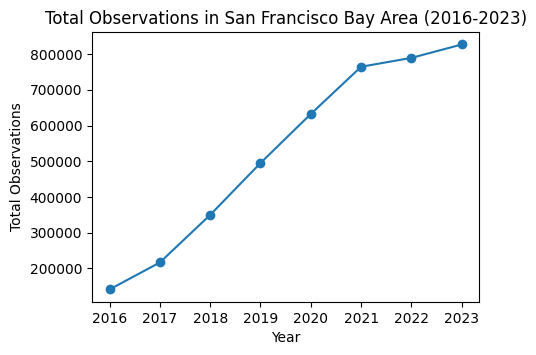

In [13]:
# Data
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
observations = [sf_2016.shape[0], sf_2017.shape[0], sf_2018.shape[0],sf_2019.shape[0], sf_2020.shape[0],sf_2021.shape[0],sf_2022.shape[0],sf_2023.shape[0]]

# Plotting
plt.figure(figsize=(5, 3.5))
plt.plot(years, observations, marker='o', linestyle='-')
plt.title('Total Observations in San Francisco Bay Area (2016-2023)')
plt.xlabel('Year')
plt.ylabel('Total Observations')
#plt.grid(True)
plt.show()


## Unique users

In [14]:
# unique users for each year 
def unique_users(df):

    #total_users = len(df)
    user_unique = len(df['user_id'].value_counts())
    
    return user_unique

In [15]:
datasets = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020,sf_2021,sf_2022,sf_2023]
years = [2016, 2017, 2018, 2019, 2020,2021,2022,2023]

unique_users_per_year = {}

for i, df in enumerate(datasets):
    year = years[i]
    unique_users_per_year[year] = unique_users(df)
    print(f'Total number of participants in San Francisco {year}:', unique_users_per_year[year])


Total number of participants in San Francisco 2016: 5702
Total number of participants in San Francisco 2017: 9061
Total number of participants in San Francisco 2018: 16002
Total number of participants in San Francisco 2019: 24362
Total number of participants in San Francisco 2020: 29781
Total number of participants in San Francisco 2021: 34270
Total number of participants in San Francisco 2022: 34619
Total number of participants in San Francisco 2023: 32843


In [16]:
# Plotting
"""
unique_users_per_year.keys(): This retrieves the keys from the dictionary 
'unique_users_per_year.values(): This retrieves the values associated with the keys in the dictionary '
"""
plt.figure(figsize=(5, 3.5))
plt.plot(unique_users_per_year.keys(), unique_users_per_year.values(),marker='o', color= 'green', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Unique User Count')
plt.title('Unique Users per Year')
plt.xticks(years)
#plt.grid(axis='y')
plt.show()

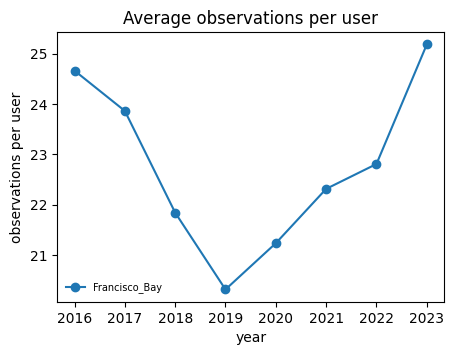

In [17]:
fig = plt.figure(figsize=(5,3.5))
for city, dfyears in dfs.items():
    x=[]; y=[];
    for year, df in dfyears.items():
        x.append(year)
        n_user = len(df['user_id'].unique())
        n_obs = len(df)
        y.append(n_obs/n_user)
    plt.plot(x, y, '-o', label=city)
    
plt.xlabel("year")
plt.ylabel("observations per user")
plt.title("Average observations per user")
plt.legend(frameon=False, fontsize=7, loc='lower left')

#plt.ylim(ymin=0)
plt.show()

## Window Analysis 

In [18]:
#Window Analyis 
plt.figure(figsize=(6, 4))
data = [sf_2016.shape[0], sf_2017.shape[0], sf_2018.shape[0], sf_2019.shape[0],sf_2020.shape[0],sf_2021.shape[0],sf_2022.shape[0],sf_2023.shape[0]]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022,2023]

# Convert the data to a Pandas Series
series = pd.Series(data, index=years)

window_size = 2  # Define the window size for analysis

# Perform window analysis (calculate mean within the window)
window_mean = series.rolling(window=window_size).mean()

print(window_mean)


# Plot the original data
plt.plot(series.index, series.values, label='Original Data', marker='o', linestyle='-')

# Plot the window mean
plt.plot(window_mean.index, window_mean.values, label=f'Window Mean (Size={window_size})', marker='x',color='green', linestyle='--')
#plt.vlines(series.index, [0], series.values, colors='blue', linestyles='dashed', alpha=0.5)  # Vertical bar lines

plt.xlabel('Year')
plt.ylabel('Observation Count')
plt.title('Window Analysis')
plt.legend()
plt.xticks(years)
#plt.grid(True)
plt.show()



2016         NaN
2017    178415.0
2018    282850.0
2019    422178.0
2020    563596.5
2021    698480.5
2022    777083.0
2023    808290.0
dtype: float64


Intervals between years: [ 75590 133280 145376 137461 132307  24898  37516]
Variance between successive years: 2246814733.8367343


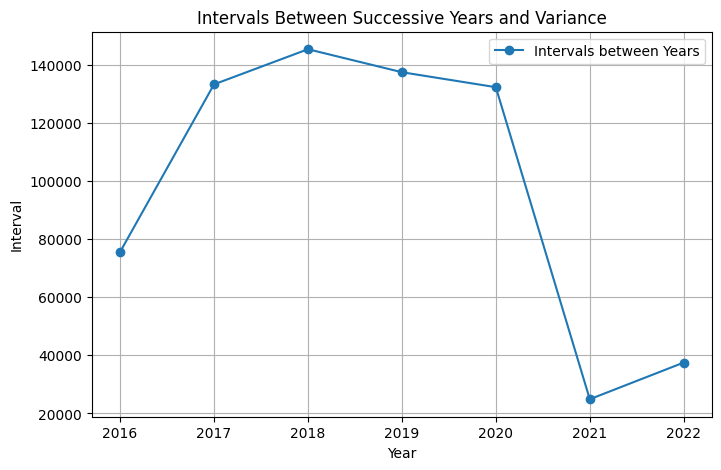

In [19]:
#calculating the interval. Interval is the differecebetween observations in consecutive years

observations = [sf_2016.shape[0], sf_2017.shape[0], sf_2018.shape[0], sf_2019.shape[0],sf_2020.shape[0],sf_2021.shape[0],sf_2022.shape[0],sf_2023.shape[0]]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022,2023]

# Convert the data to a Pandas Series
series = pd.Series(observations, index=years)

# Calculate the interval
intervals = np.diff(series)  # calculate the differences between years

# Calculate variance between observations of successive years, 
#"variance" is a measure of the spread or variability among these differences. my note 
variance_between_years = np.var(intervals)

print("Intervals between years:", intervals)
print("Variance between successive years:", variance_between_years)


# Plotting the intervals between successive years
plt.figure(figsize=(8, 5))
plt.plot(range(2016, 2023), intervals, marker='o', linestyle='-', label='Intervals between Years')
#plt.axhline(y=variance_between_years, color='r', linestyle='--', label='Variance between Intervals')

plt.xlabel('Year')
plt.ylabel('Interval')
plt.title('Intervals Between Successive Years and Variance')
plt.legend()
plt.grid(True)
plt.show()

## Observation per user

Total number of observations in San Francisco 2016: 140620


Total number of observations in San Francisco 2017: 216210


Total number of observations in San Francisco 2018: 349490


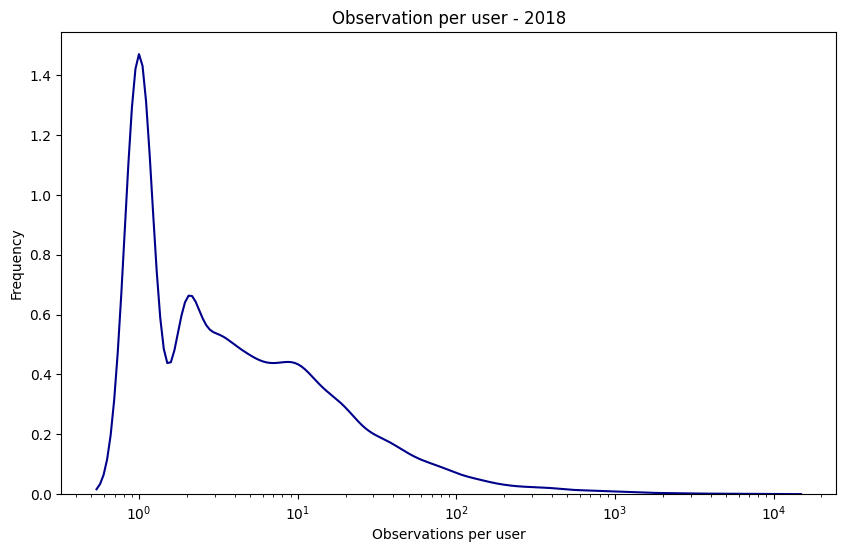

Total number of observations in San Francisco 2019: 494866


Total number of observations in San Francisco 2020: 632327


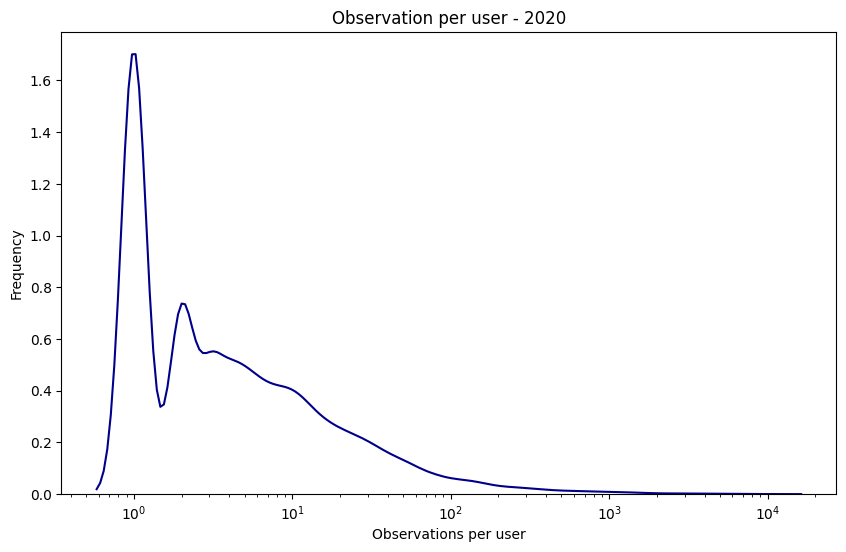

Total number of observations in San Francisco 2021: 764634


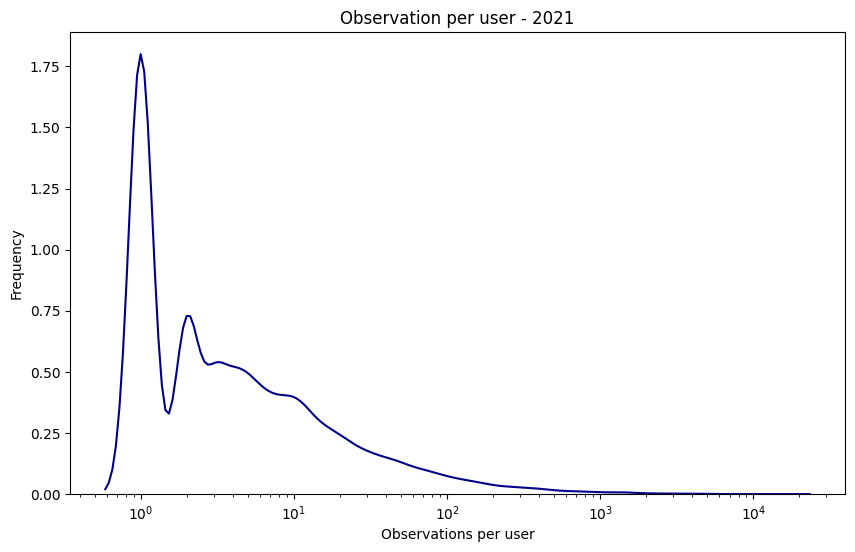

Total number of observations in San Francisco 2022: 789532


Total number of observations in San Francisco 2023: 827048


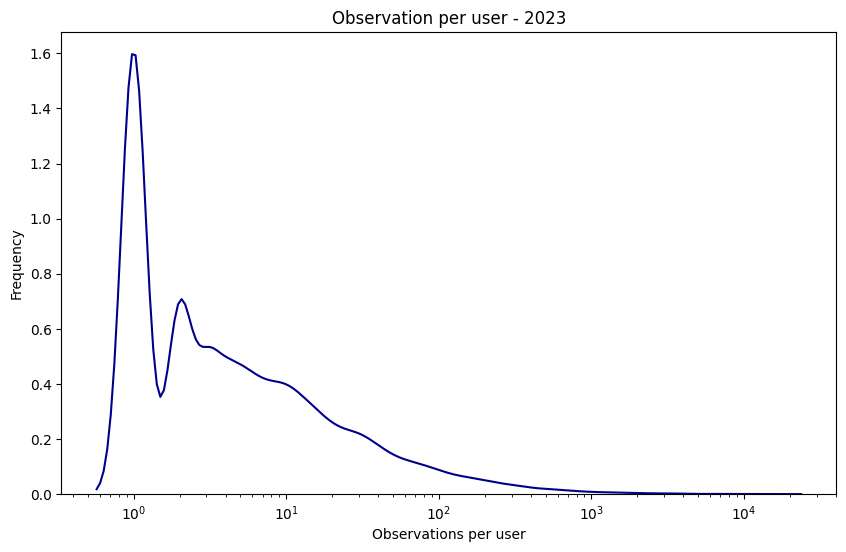

      user_id  total_obs
0        3342       5404
1       16101       4089
2       13979       3141
3      179103       2864
4        3494       2699
...       ...        ...
5697   320314          1
5698   320910          1
5699   320938          1
5700   276293          1
5701  6273589          1

[5702 rows x 2 columns]


In [20]:
datasets = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Create a dictionary to store DataFrames for each year
observation_per_year = {}

for i, df in enumerate(datasets): #iterate through dfs
    year = years[i] # iterate through years
    
     #Calculate Observations per User. df will have user_id and totalobs
    obs_per_user = df['user_id'].value_counts().rename_axis('user_id').reset_index(name='total_obs')

    #store data in Dictionary
    observation_per_year[year] = obs_per_user
    print(f'Total number of observations in San Francisco {year}:', df.shape[0])

    # plot
    plt.figure(figsize=(10, 6))
    #ax = sns.histplot(data=obs_per_user, x="total_obs", log_scale=True, bins=50, color='darkblue', kde=True)
    ax = sns.kdeplot(data=obs_per_user['total_obs'], log_scale=True, color='darkblue')
    ax.set(xlabel='Observations per user', ylabel='Frequency', title=f"Observation per user - {year}")
    plt.show()
    

# Access each DataFrame by year
df_2016 = observation_per_year[2016]
df_2017 = observation_per_year[2017]
df_2018 = observation_per_year[2018]
df_2019 = observation_per_year[2019]
df_2020 = observation_per_year[2020]
df_2021 = observation_per_year[2021]
df_2022 = observation_per_year[2022]
df_2023 = observation_per_year[2023]

# Example: Display the DataFrame for 2016
print(df_2016)


2024-02-27 22:56:21.572 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.000302)
2024-02-27 22:56:21.578 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.00021)
2024-02-27 22:56:21.649 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.000305)


sumsquare_error            aic            bic  kl_div  ks_statistic  \
rayleigh         0.000210   36227.874460   36241.171605     inf      0.474775   
uniform          0.000302    1722.941927    1736.239071     inf      0.949906   
gamma            0.000305  347451.413376  347471.359092     inf      0.638464   

          ks_pvalue  
rayleigh        0.0  
uniform         0.0  
gamma           0.0

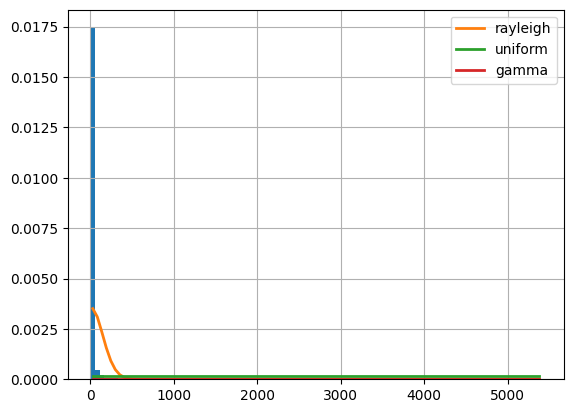

In [179]:
#test
data = df_2016['total_obs']

#normalise log transform
#log_transformed_data = np.log(data)

from fitter import Fitter
f = Fitter(data, distributions=['gamma', 'rayleigh', 'uniform'])
f.fit()

f.summary()

2024-02-26 21:42:53.852 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.000302)
2024-02-26 21:42:53.855 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.00021)
2024-02-26 21:42:53.920 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.000305)
2024-02-26 21:42:53.966 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.000227)
2024-02-26 21:42:53.970 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.000153)
2024-02-26 21:42:54.051 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.00023)
2024-02-26 21:42:54.109 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.000143)
2024-02-26 21:42:54.113 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitte

Summary for 2016:
          sumsquare_error            aic            bic  kl_div  ks_statistic  \
rayleigh         0.000210   36227.874460   36241.171605     inf      0.474775   
uniform          0.000302    1722.941927    1736.239071     inf      0.949906   
gamma            0.000305  347451.413376  347471.359092     inf      0.638464   

          ks_pvalue  
rayleigh        0.0  
uniform         0.0  
gamma           0.0  
Summary for 2017:
          sumsquare_error            aic            bic    kl_div  \
rayleigh         0.000153   42612.105662   42626.329131       inf   
uniform          0.000227    1753.311471    1767.534940       inf   
gamma            0.000230  404298.382372  404319.717576  0.048156   

          ks_statistic  ks_pvalue  
rayleigh      0.472354        0.0  
uniform       0.954901        0.0  
gamma         0.683033        0.0  


2024-02-26 21:42:54.233 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.000145)
2024-02-26 21:42:54.292 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.000117)
2024-02-26 21:42:54.296 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=5.7e-05)
2024-02-26 21:42:54.421 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.000118)


Summary for 2018:
          sumsquare_error            aic            bic    kl_div  \
rayleigh         0.000078   85354.510532   85369.871470       inf   
uniform          0.000143    1801.664238    1817.025176       inf   
gamma            0.000145  519454.938676  519477.980083  0.036789   

          ks_statistic  ks_pvalue  
rayleigh      0.462097        0.0  
uniform       0.962275        0.0  
gamma         0.780319        0.0  
Summary for 2019:


2024-02-26 21:42:54.477 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.000103)
2024-02-26 21:42:54.481 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=4.8e-05)


          sumsquare_error            aic            bic    kl_div  \
rayleigh         0.000057  113222.378127  113238.579687       inf   
uniform          0.000117    1823.053233    1839.254792       inf   
gamma            0.000118  578286.725144  578311.027484  0.032456   

          ks_statistic  ks_pvalue  
rayleigh      0.461878        0.0  
uniform       0.964636        0.0  
gamma         0.839480        0.0  


2024-02-26 21:42:54.682 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.000104)
2024-02-26 21:42:54.744 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=5e-05)
2024-02-26 21:42:54.749 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1.8e-05)


Summary for 2020:
          sumsquare_error            aic            bic    kl_div  \
rayleigh         0.000048  122163.377418  122179.980670       inf   
uniform          0.000103    1835.619852    1852.223104       inf   
gamma            0.000104  612514.392225  612539.297103  0.030825   

          ks_statistic  ks_pvalue  
rayleigh      0.462011        0.0  
uniform       0.965232        0.0  
gamma         0.792125        0.0  


2024-02-26 21:42:54.966 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=5.1e-05)
2024-02-26 21:42:55.113 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=4e-05)
2024-02-26 21:42:55.117 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1.4e-05)


Summary for 2021:
          sumsquare_error            aic            bic    kl_div  \
rayleigh         0.000018  203537.811263  203554.695315       inf   
uniform          0.000050    1908.913400    1925.797451       inf   
gamma            0.000051  848005.735632  848031.061709  0.024428   

          ks_statistic  ks_pvalue  
rayleigh      0.466897        0.0  
uniform       0.969038        0.0  
gamma         0.878411        0.0  


2024-02-26 21:42:55.337 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=4e-05)
2024-02-26 21:42:55.394 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=5.1e-05)
2024-02-26 21:42:55.397 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=2.1e-05)


Summary for 2022:
          sumsquare_error            aic            bic    kl_div  \
rayleigh         0.000014  203494.938527  203511.842843       inf   
uniform          0.000040    1932.216657    1949.120973       inf   
gamma            0.000040  978897.472098  978922.828571  0.022109   

          ks_statistic  ks_pvalue  
rayleigh      0.472308        0.0  
uniform       0.970462        0.0  
gamma         0.895550        0.0  


2024-02-26 21:42:55.607 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=5.1e-05)


Summary for 2023:
          sumsquare_error            aic            bic    kl_div  \
rayleigh         0.000021  160595.113395  160611.912382       inf   
uniform          0.000051    1906.651165    1923.450153       inf   
gamma            0.000051  841102.319486  841127.517968  0.030042   

          ks_statistic  ks_pvalue  
rayleigh      0.459457        0.0  
uniform       0.966547        0.0  
gamma         0.871963        0.0  


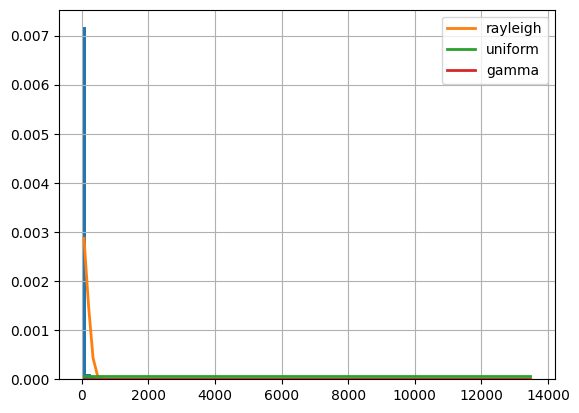

In [23]:
df_2016 = observation_per_year[2016]
df_2017 = observation_per_year[2017]
df_2018 = observation_per_year[2018]
df_2019 = observation_per_year[2019]
df_2020 = observation_per_year[2020]
df_2021 = observation_per_year[2021]
df_2022 = observation_per_year[2022]
df_2023 = observation_per_year[2023]

# Dataframes and years
dataframes = [df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

for df, year in zip(dataframes, years):
    data = df['total_obs']
    
    f = Fitter(data, distributions=['gamma', 'rayleigh', 'uniform'])
    f.fit()

    print(f"Summary for {year}:")
    print(f.summary())

    # Plot histogram
    #ax = sns.histplot(data=data, color='darkblue', bins=50)
    #plt.title(f'Histogram for {year}')
    #plt.show()

In [180]:
def observation_per_user(data, year):
    obs_per_user = data['user_id'].value_counts().rename_axis('user_id').reset_index(name='total_obs')
    ax = sns.displot(data=obs_per_user, x="total_obs", log_scale=(True), bins=50, color='darkblue')
    #ax = sns.displot(data=obs_per_user, x="total_obs", log_scale=(True, True), kde_kws={'log_scale': (True, True)})
    ax.set(xlabel='observation per user', ylabel='frequency', title=f"Observation per user - {year}")
    #plt.show()

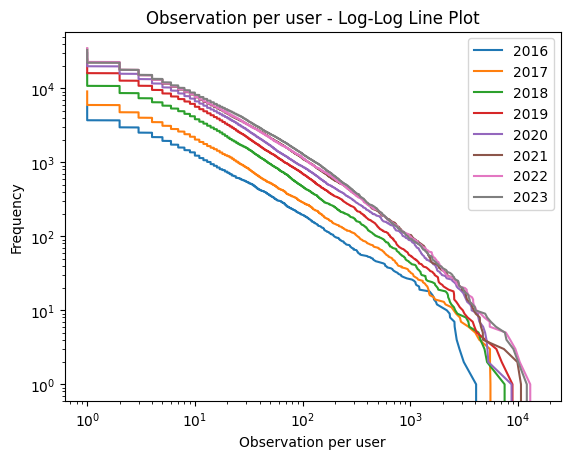

In [181]:
def observation_per_user(data, year):
    obs_per_user = data['user_id'].value_counts().rename_axis('user_id').reset_index(name='total_obs')
    # Use plt.plot() with log scales for log-log line plot
    plt.plot(obs_per_user['total_obs'], obs_per_user.index, label=str(year))

# Dataframes and years
dataframes = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Plot each year on the same log-log line plot
for df, year in zip(dataframes, years):
    observation_per_user(df, year)

# plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Observation per user')
plt.ylabel('Frequency')
plt.title('Observation per user - Log-Log Line Plot')
plt.legend()
plt.show()


## Fitting regression line for observation

In [182]:
def observation_per_user_fitting(data, year):
    fig = plt.figure(figsize=(6,4))
    obs_per_user = data['user_id'].value_counts().rename_axis('user_id').reset_index(name='total_obs')
    plt.plot(obs_per_user['total_obs'])

    # Fit a regression line using linear regression on the log-transformed data
    x = np.log(obs_per_user.index + 1)  # Adding 1 to avoid log(0)
    y = np.log(obs_per_user['total_obs'])
    
    coefficients = np.polyfit(x, y, 1)
    fit_line = np.exp(coefficients[1]) * (obs_per_user.index + 1)**coefficients[0]

    
    # Plot the regression line
    plt.plot(obs_per_user.index + 1, fit_line, label='Regression Line', linestyle='--')
    
    # Print regression line coefficients
    original_scale_slope = np.exp(coefficients[0])

    print(f"Original Scale Slope: {original_scale_slope}")
    print(f'Regression Line Coefficients (log-log scale): Intercept={coefficients[1]}, Slope={coefficients[0]}')
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Observation per user')
    plt.ylabel('Frequency')
    plt.title(f"Observation per user - {year}")
    plt.show()
    plt.show()

Original Scale Slope: 0.2388473575719806
Regression Line Coefficients (log-log scale): Intercept=12.295297357701319, Slope=-1.43193060233493


Original Scale Slope: 0.24265143259322364
Regression Line Coefficients (log-log scale): Intercept=12.840595057134319, Slope=-1.416129299199345


Original Scale Slope: 0.2466329191324085
Regression Line Coefficients (log-log scale): Intercept=13.55058334995828, Slope=-1.3998542051400389


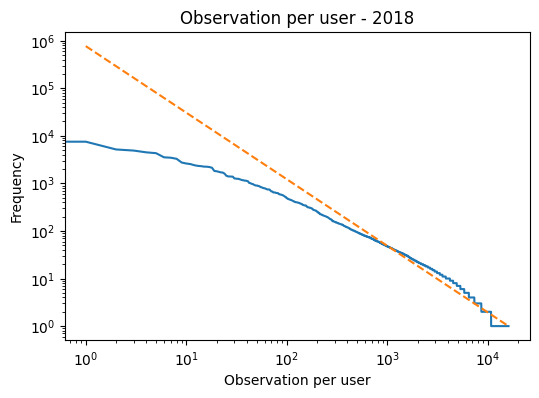

Original Scale Slope: 0.24992976492407046
Regression Line Coefficients (log-log scale): Intercept=13.970028177329109, Slope=-1.3865753408947288


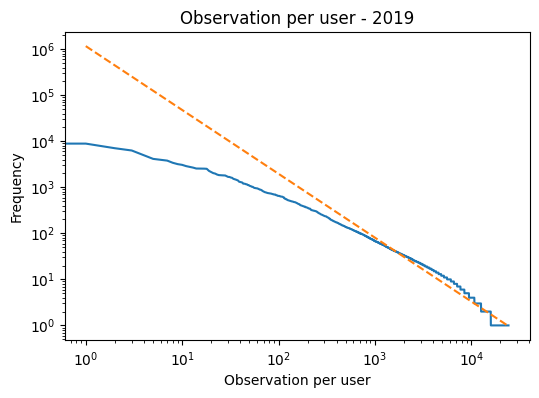

Original Scale Slope: 0.24992976492407046
Regression Line Coefficients (log-log scale): Intercept=13.970028177329109, Slope=-1.3865753408947288


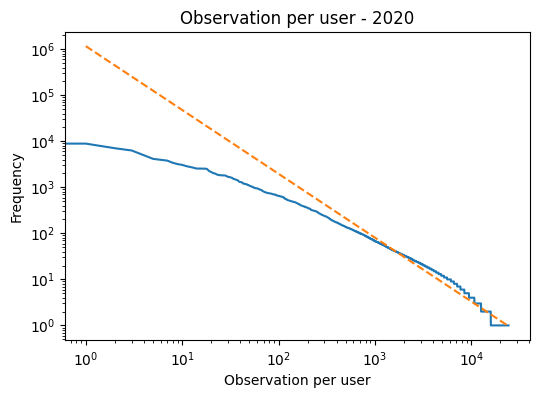

Original Scale Slope: 0.24956610237775903
Regression Line Coefficients (log-log scale): Intercept=14.267709901734955, Slope=-1.3880314594909904


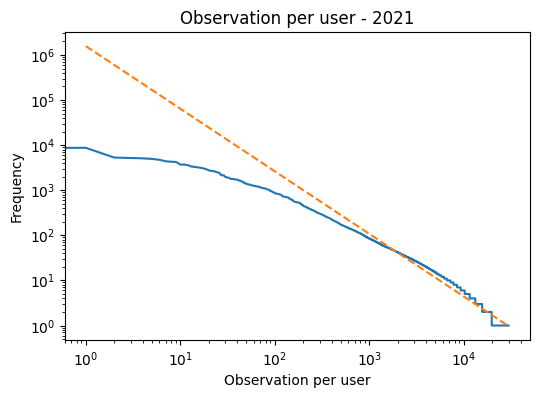

Original Scale Slope: 0.2430851026793964
Regression Line Coefficients (log-log scale): Intercept=14.69890174236194, Slope=-1.4143436801655338


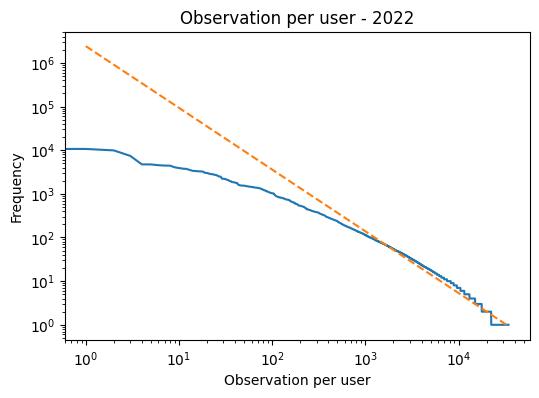

Original Scale Slope: 0.24308166809617435
Regression Line Coefficients (log-log scale): Intercept=14.710982781645795, Slope=-1.414357809404423


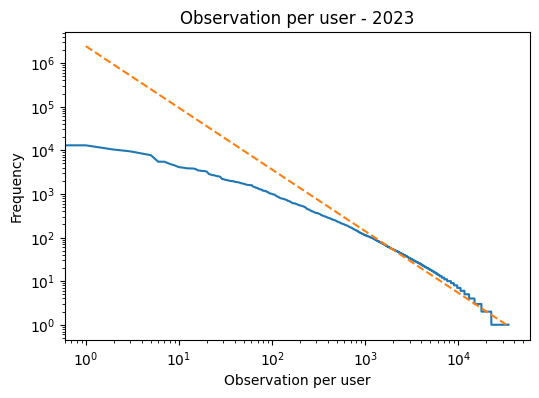

In [183]:
dataframes = [sf_2016, sf_2017, sf_2018, sf_2019,sf_2019,sf_2020,sf_2021,sf_2022,sf_2023]
years = [2016, 2017, 2018, 2019, 2020,2021,2022,2023]

for df, year in zip(dataframes, years):
    observation_per_user_fitting(df, year)

## Fitting using fitter function 

## observation per day

In [184]:
def observation_per_day(data, year):
    data_copy = data.copy() # Create a copy of the DataFrame
    data_copy['time_observed_at'] = pd.to_datetime(data_copy['time_observed_at'])
    
    # set 'time_observed_at' as the index
    data_copy.set_index('time_observed_at', inplace=True)
    
    # count daily counts 
    daily_counts = data_copy.resample('D').size()
    
    # Reset the index to avoid issues on subsequent runs
    data_copy.reset_index(inplace=True)
    
    # Plotting
    plt.plot(daily_counts.index, daily_counts, label=str(year))
    
    return daily_counts

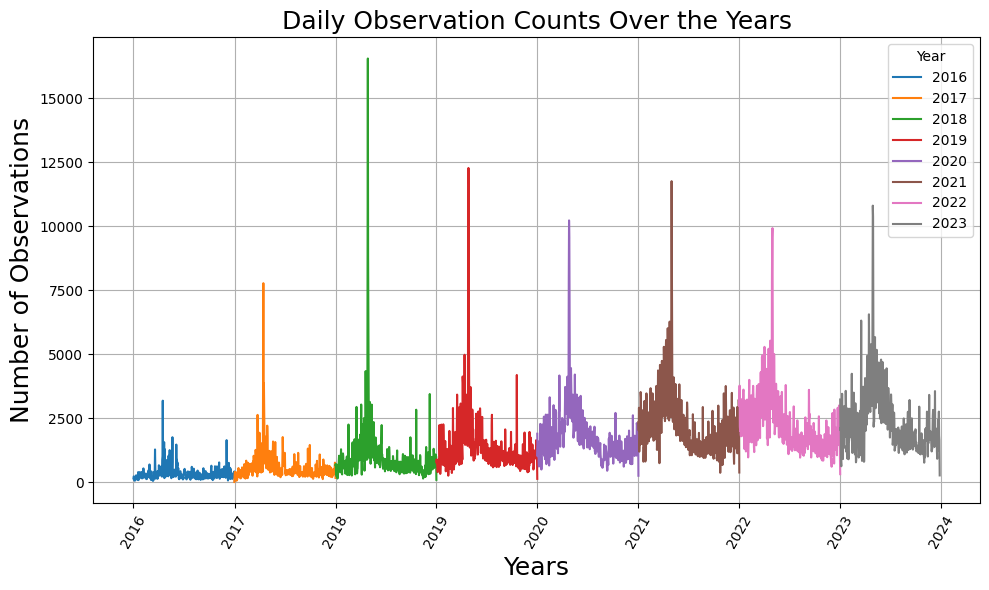

In [187]:

dataframes = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

plt.figure(figsize=(10, 6))

# Plot
for df, year in zip(dataframes, years):
    observation_per_day(df, year)

plt.title('Daily Observation Counts Over the Years', fontsize=18)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Number of Observations', fontsize=18)
plt.legend(title='Year', loc='upper right')
plt.grid(True)

# Set x-axis ticks to week numbers
plt.xticks(rotation=60)


plt.tight_layout()
plt.show()

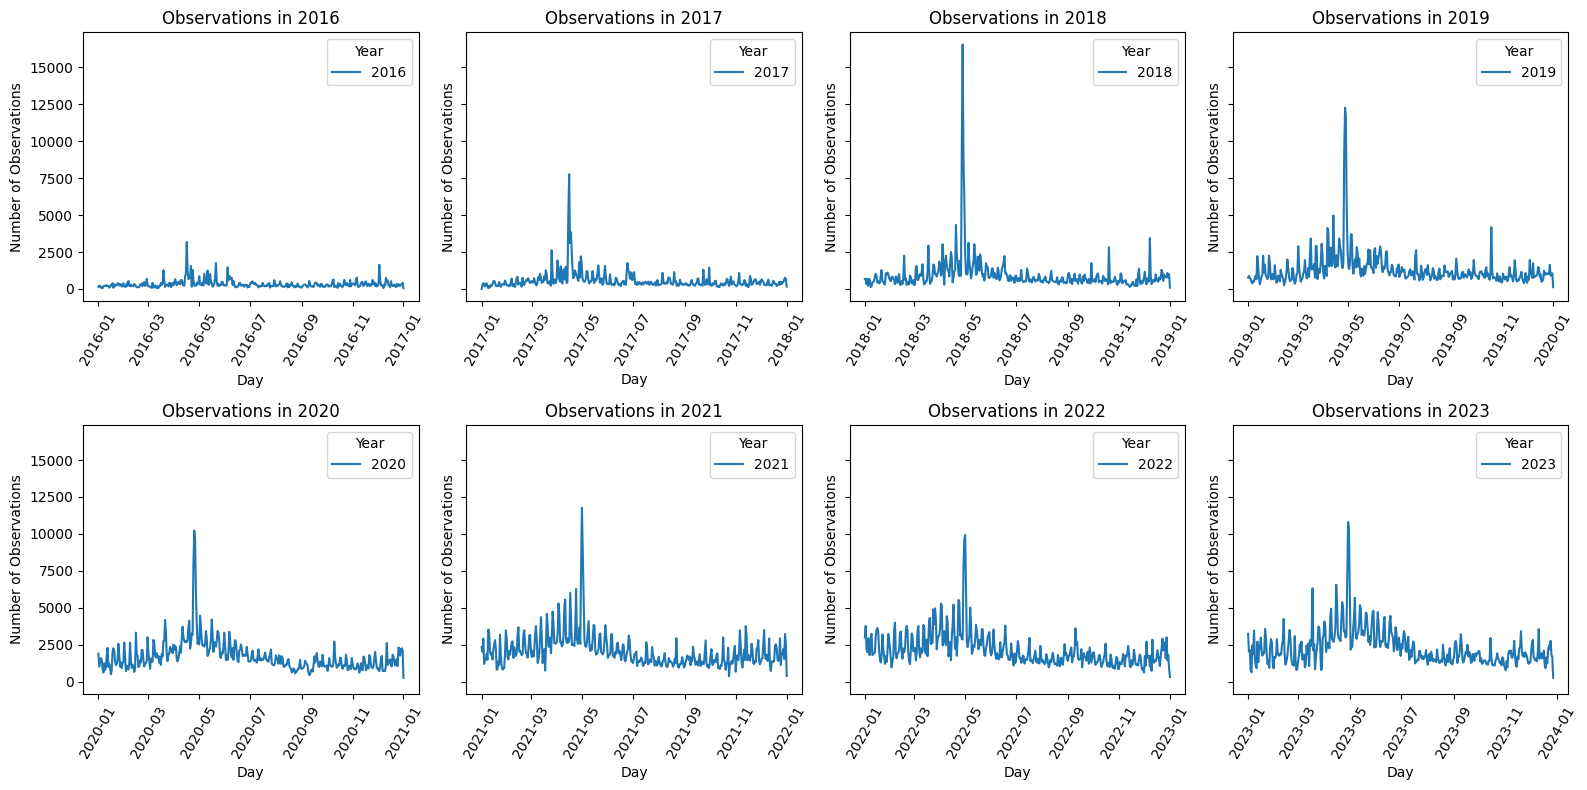

In [161]:
# Dataframes and years
dataframes = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Create separate subplots for each year
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8), sharey=True)
axes = axes.flatten()

# Plotting
for i, (df, year) in enumerate(zip(dataframes, years)):
    #ax = axes[i]
    plt.sca(axes[i])
    observation_per_day(df, year)
    
    plt.title(f'Observations in {year}')
    plt.xlabel('Day')
    plt.ylabel('Number of Observations')
    plt.legend(title='Year', loc='upper right')
    plt.xticks(rotation=60)

plt.tight_layout()
plt.show()


2024-02-27 19:56:47.486 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1.6e-05)
2024-02-27 19:56:47.492 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=6e-05)
2024-02-27 19:56:47.533 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=7e-05)


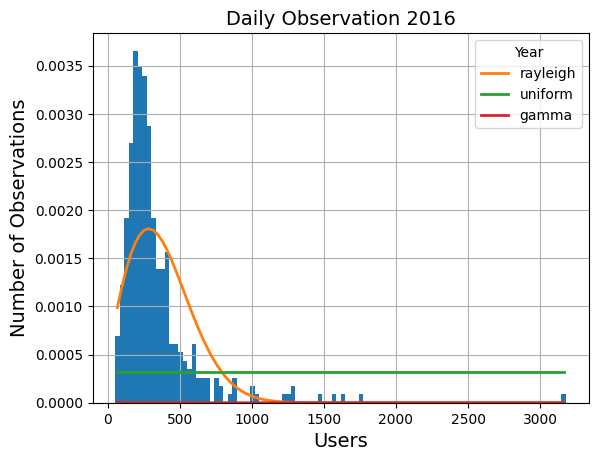

In [112]:
# Test

data_t_cleaned = data_t.dropna().values

# Fit the distribution using Fitter
f = Fitter(data_t_cleaned, distributions=['gamma', 'rayleigh', 'uniform'])
f.fit()
f.summary()

plt.title('Daily Observation 2016', fontsize=14)
plt.xlabel('Users', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)
plt.legend(title='Year', loc='upper right')
plt.grid(True)

2024-02-27 23:01:49.075 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1.6e-05)
2024-02-27 23:01:49.077 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=6e-05)
2024-02-27 23:01:49.111 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=7e-05)


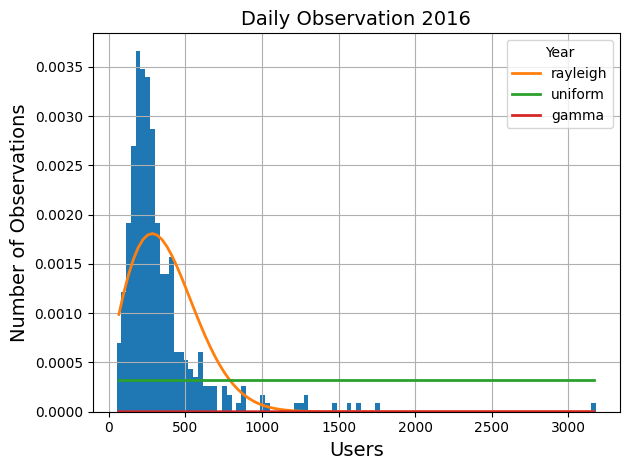

2024-02-27 23:01:49.294 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=7e-06)
2024-02-27 23:01:49.295 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=1.7e-05)
2024-02-27 23:01:49.320 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1.8e-05)


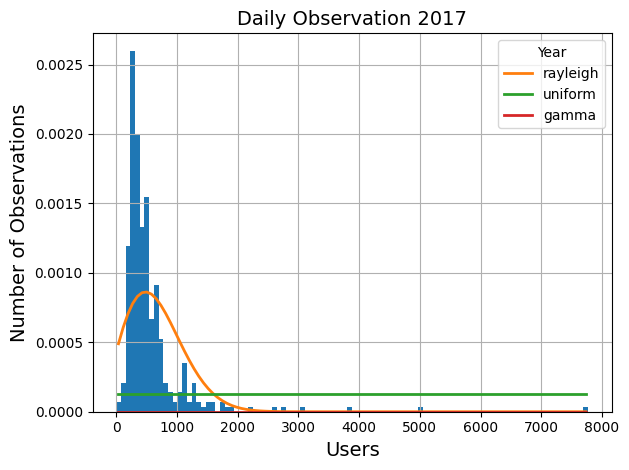

2024-02-27 23:01:49.482 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=2e-06)
2024-02-27 23:01:49.483 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=5e-06)
2024-02-27 23:01:49.516 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=5e-06)


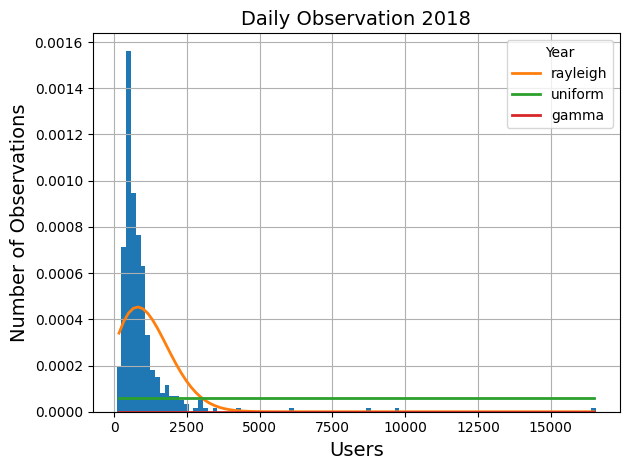

2024-02-27 23:01:49.867 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=2e-06)
2024-02-27 23:01:49.868 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=4e-06)
2024-02-27 23:01:49.897 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1e-06)


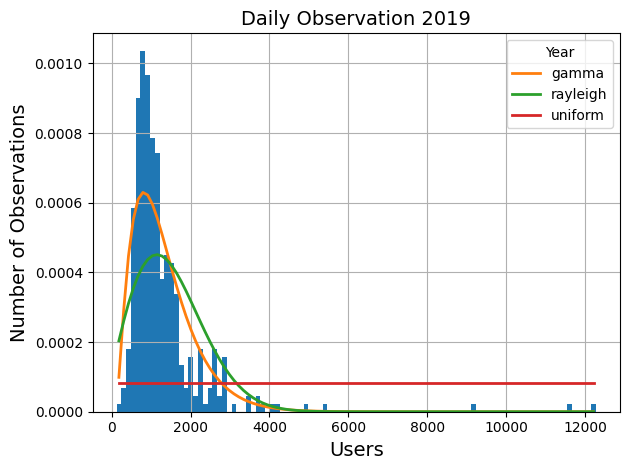

2024-02-27 23:01:50.061 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1e-06)
2024-02-27 23:01:50.063 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=4e-06)
2024-02-27 23:01:50.094 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=5e-06)


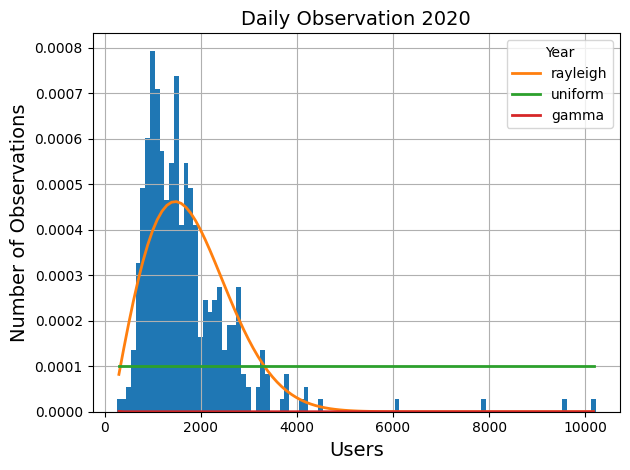

2024-02-27 23:01:50.260 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1e-06)
2024-02-27 23:01:50.261 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=3e-06)
2024-02-27 23:01:50.286 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=4e-06)


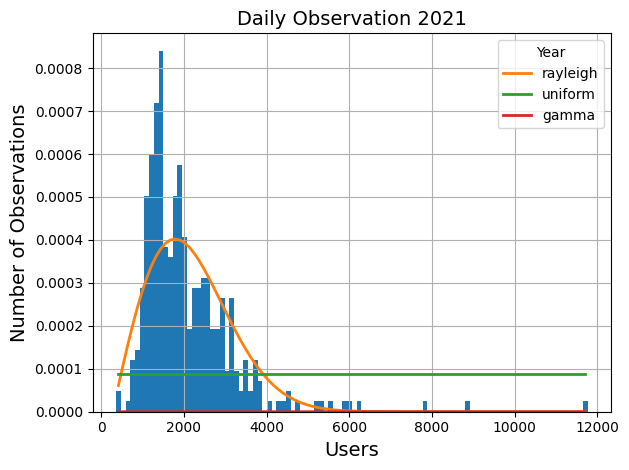

2024-02-27 23:01:50.451 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1e-06)
2024-02-27 23:01:50.453 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=3e-06)
2024-02-27 23:01:50.484 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=4e-06)


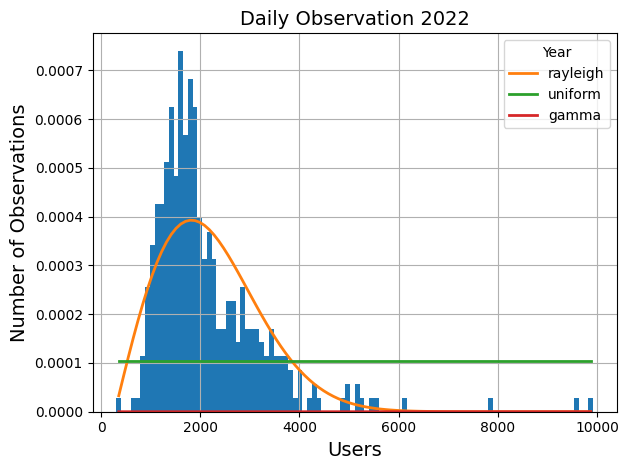

2024-02-27 23:01:50.646 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)
2024-02-27 23:01:50.647 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=2e-06)
2024-02-27 23:01:50.683 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=3e-06)


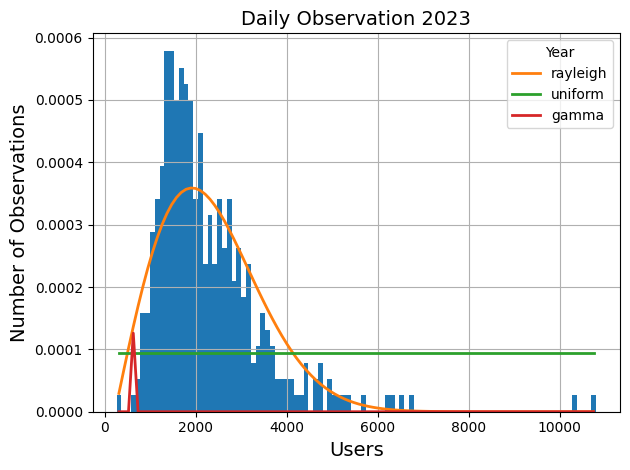

In [188]:
dai_ob_2016 = observation_per_day(sf_2016,2016)
dai_ob_2017 = observation_per_day(sf_2017,2017)
dai_ob_2018 = observation_per_day(sf_2018,2018)
dai_ob_2019 = observation_per_day(sf_2019,2019)
dai_ob_2020 = observation_per_day(sf_2020,2020)
dai_ob_2021 = observation_per_day(sf_2021,2021)
dai_ob_2022 = observation_per_day(sf_2022,2022)
dai_ob_2023 = observation_per_day(sf_2023,2023)

dai_ob_c_2016 = dai_ob_2016.dropna().values
dai_ob_c_2017 = dai_ob_2017.dropna().values
dai_ob_c_2018 = dai_ob_2018.dropna().values
dai_ob_c_2019 = dai_ob_2019.dropna().values
dai_ob_c_2020 = dai_ob_2020.dropna().values
dai_ob_c_2021 = dai_ob_2021.dropna().values
dai_ob_c_2022 = dai_ob_2022.dropna().values
dai_ob_c_2023 = dai_ob_2023.dropna().values


# Fit the distribution using Fitter
f = Fitter(dai_ob_c_2016, distributions=['gamma', 'rayleigh', 'uniform'])
f.fit()
f.summary()

plt.title('Daily Observation 2016', fontsize=14)
plt.xlabel('Users', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)
plt.legend(title='Year', loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

# Fit the distribution using Fitter
f = Fitter(dai_ob_c_2017, distributions=['gamma', 'rayleigh', 'uniform'])
f.fit()
f.summary()

plt.title('Daily Observation 2017', fontsize=14)
plt.xlabel('Users', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)
plt.legend(title='Year', loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

# Fit the distribution using Fitter
f = Fitter(dai_ob_c_2018, distributions=['gamma', 'rayleigh', 'uniform'])
f.fit()
f.summary()

plt.title('Daily Observation 2018', fontsize=14)
plt.xlabel('Users', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)
plt.legend(title='Year', loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

# Fit the distribution using Fitter
f = Fitter(dai_ob_c_2019, distributions=['gamma', 'rayleigh', 'uniform'])
f.fit()
f.summary()

plt.title('Daily Observation 2019', fontsize=14)
plt.xlabel('Users', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)
plt.legend(title='Year', loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

# Fit the distribution using Fitter
f = Fitter(dai_ob_c_2020, distributions=['gamma', 'rayleigh', 'uniform'])
f.fit()
f.summary()

plt.title('Daily Observation 2020', fontsize=14)
plt.xlabel('Users', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)
plt.legend(title='Year', loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

# Fit the distribution using Fitter
f = Fitter(dai_ob_c_2021, distributions=['gamma', 'rayleigh', 'uniform'])
f.fit()
f.summary()

plt.title('Daily Observation 2021', fontsize=14)
plt.xlabel('Users', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)
plt.legend(title='Year', loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

# Fit the distribution using Fitter
f = Fitter(dai_ob_c_2022, distributions=['gamma', 'rayleigh', 'uniform'])
f.fit()
f.summary()

plt.title('Daily Observation 2022', fontsize=14)
plt.xlabel('Users', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)
plt.legend(title='Year', loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

# Fit the distribution using Fitter
f = Fitter(dai_ob_c_2023, distributions=['gamma', 'rayleigh', 'uniform'])
f.fit()
f.summary()

plt.title('Daily Observation 2023', fontsize=14)
plt.xlabel('Users', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)
plt.legend(title='Year', loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()



2024-02-27 23:22:10.934 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1.6e-05)
2024-02-27 23:22:10.938 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=6e-05)
2024-02-27 23:22:10.971 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=7e-05)


          sumsquare_error            aic            bic  kl_div  ks_statistic  \
rayleigh         0.000016    4087.276212    4095.086936     inf      0.212759   
uniform          0.000060    1613.757657    1621.568380     inf      0.740639   
gamma            0.000070  144149.824918  144161.541003     inf      0.993957   

              ks_pvalue  
rayleigh   4.668148e-15  
uniform   2.042874e-207  
gamma      0.000000e+00  


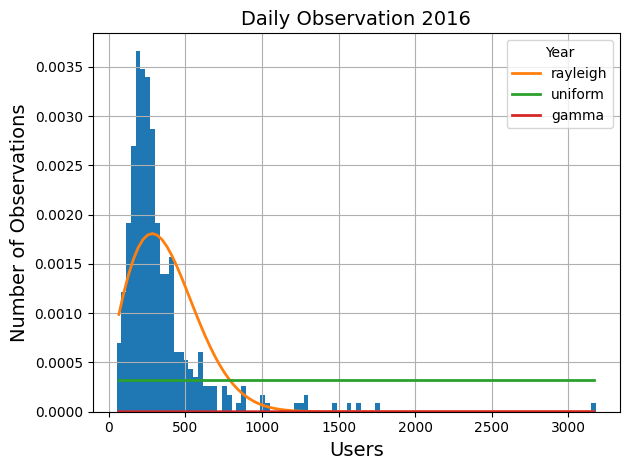

2024-02-27 23:22:11.233 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=7e-06)
2024-02-27 23:22:11.235 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=1.7e-05)
2024-02-27 23:22:11.261 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1.8e-05)


          sumsquare_error            aic            bic  kl_div  ks_statistic  \
rayleigh         0.000007    5436.191895    5444.002619     inf      0.258064   
uniform          0.000017    1795.630827    1803.441551     inf      0.781349   
gamma            0.000018  261902.431366  261914.147452     inf      0.997275   

              ks_pvalue  
rayleigh   4.818394e-22  
uniform   7.692060e-238  
gamma      0.000000e+00  


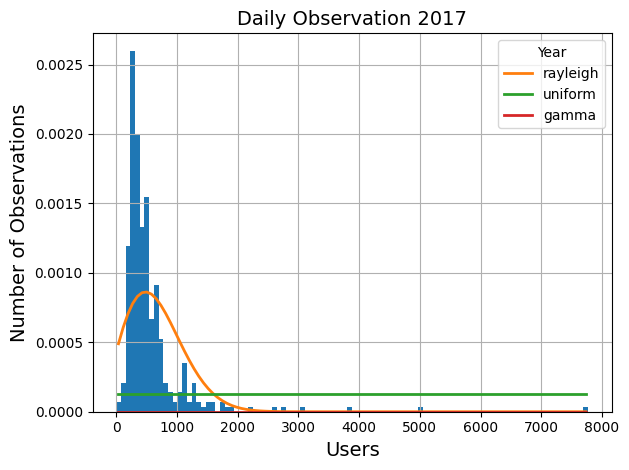

2024-02-27 23:22:11.474 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=2e-06)
2024-02-27 23:22:11.475 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=5e-06)
2024-02-27 23:22:11.508 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=5e-06)


          sumsquare_error            aic            bic  kl_div  ks_statistic  \
rayleigh         0.000002    6747.217282    6755.022548     inf      0.287077   
uniform          0.000005    1945.810586    1953.615852     inf      0.834217   
gamma            0.000005  367822.122768  367833.830668     inf      0.997268   

              ks_pvalue  
rayleigh   3.394653e-27  
uniform   2.002658e-284  
gamma      0.000000e+00  


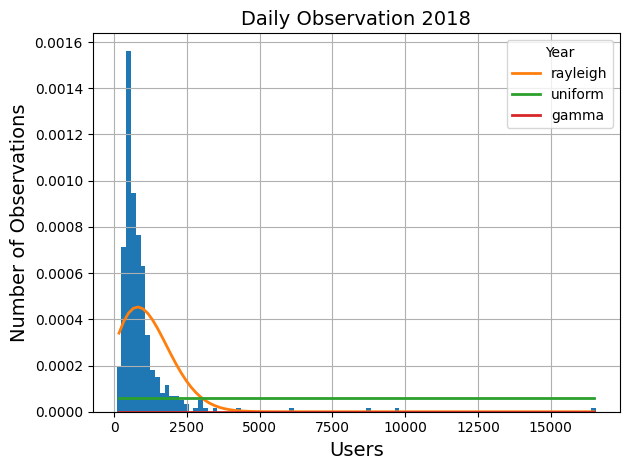

2024-02-27 23:22:11.732 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=4e-06)
2024-02-27 23:22:11.733 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=2e-06)
2024-02-27 23:22:11.765 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1e-06)


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma        7.367303e-07  3094.180851  3105.888751     inf      0.114894   
rayleigh     1.597961e-06  4122.435272  4130.240539     inf      0.221524   
uniform      4.485702e-06  1885.016890  1892.822156     inf      0.734604   

              ks_pvalue  
gamma      1.151467e-04  
rayleigh   2.954899e-16  
uniform   1.075278e-202  


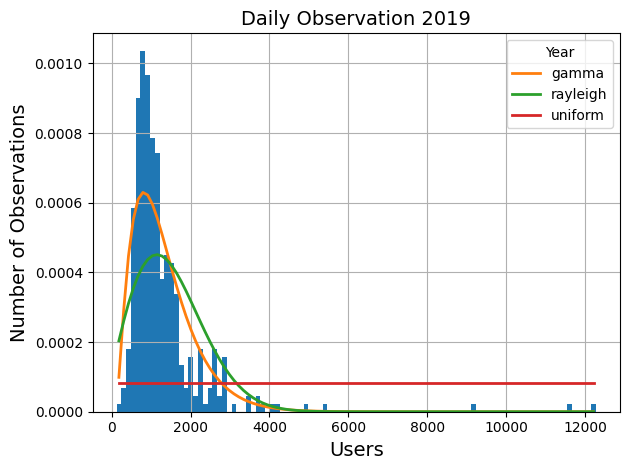

2024-02-27 23:22:11.974 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1e-06)
2024-02-27 23:22:11.977 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=4e-06)
2024-02-27 23:22:12.010 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=5e-06)


          sumsquare_error           aic           bic  kl_div  ks_statistic  \
rayleigh     6.774019e-07   3202.497545   3210.308269     inf      0.135587   
uniform      3.610177e-06   1845.647633   1853.458356     inf      0.668389   
gamma        4.614350e-06  92795.511215  92807.227300     inf      0.997275   

              ks_pvalue  
rayleigh   2.402719e-06  
uniform   3.958130e-162  
gamma      0.000000e+00  


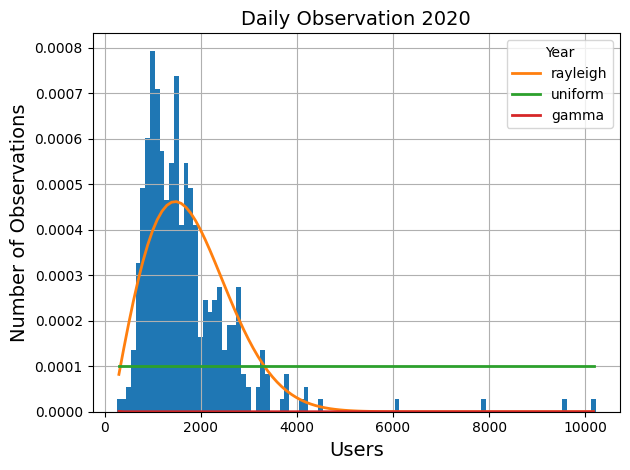

2024-02-27 23:22:12.241 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1e-06)
2024-02-27 23:22:12.246 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=3e-06)
2024-02-27 23:22:12.270 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=4e-06)


          sumsquare_error            aic            bic  kl_div  ks_statistic  \
rayleigh     6.664688e-07    3198.950953    3206.756219     inf      0.122616   
uniform      2.887142e-06    1872.238636    1880.043903     inf      0.656107   
gamma        3.656880e-06  237766.874685  237778.582585     inf      0.997153   

              ks_pvalue  
rayleigh   2.969328e-05  
uniform   6.822312e-155  
gamma      0.000000e+00  


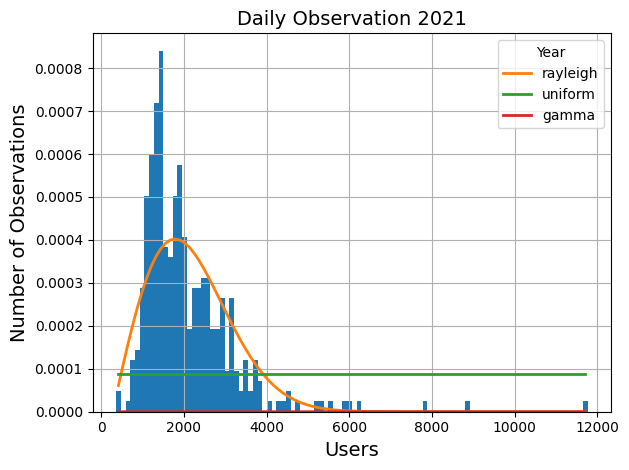

2024-02-27 23:22:12.493 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1e-06)
2024-02-27 23:22:12.494 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=3e-06)
2024-02-27 23:22:12.526 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=4e-06)


          sumsquare_error            aic            bic  kl_div  ks_statistic  \
rayleigh     6.470202e-07    2606.499042    2614.304309     inf      0.130809   
uniform      3.048471e-06    1838.195130    1846.000396     inf      0.579936   
gamma        4.130380e-06  155654.652400  155666.360300     inf      0.997268   

              ks_pvalue  
rayleigh   6.393908e-06  
uniform   2.423582e-117  
gamma      0.000000e+00  


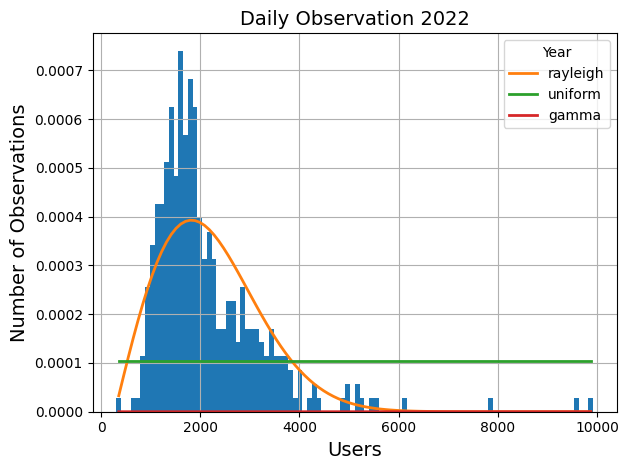

2024-02-27 23:22:12.740 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=2e-06)
2024-02-27 23:22:12.741 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)
2024-02-27 23:22:12.778 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=3e-06)


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
rayleigh     4.092198e-07  2629.269843  2637.047599     inf      0.101164   
uniform      2.398064e-06  1856.643482  1864.421238     inf      0.587256   
gamma        3.306958e-06          inf          inf     inf      0.994460   

              ks_pvalue  
rayleigh   1.140915e-03  
uniform   5.381723e-119  
gamma      0.000000e+00  


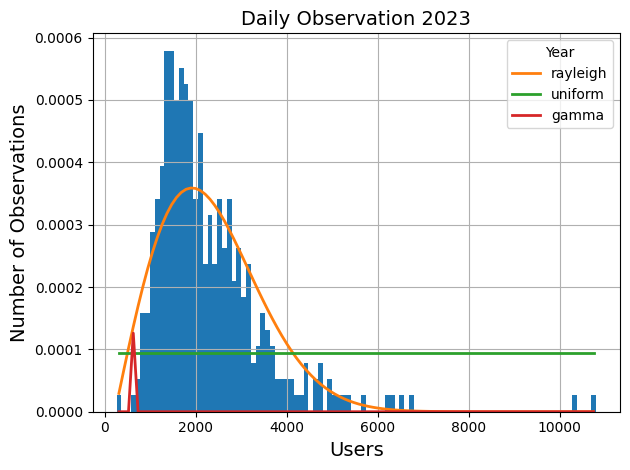

In [204]:
#Method 2 : this is efficient than the one i did up

def fit_and_plot_distribution(data, year):
    # Fit the distribution using Fitter
    f = Fitter(data, distributions=['gamma', 'rayleigh', 'uniform'])
    f.fit()
    f.summary()
    
    # Summary table
    summary_table = f.summary()

    # Print summary table
    print(summary_table)

    plt.title(f'Daily Observation {year}', fontsize=14)
    plt.xlabel('Users', fontsize=14)
    plt.ylabel('Number of Observations', fontsize=14)
    plt.legend(title='Year', loc='upper right')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

for year in years:
    data = globals()[f'dai_ob_c_{year}']
    fit_and_plot_distribution(data, year)
    


2024-02-27 21:12:51.682 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1.6e-05)
2024-02-27 21:12:51.682 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=6e-05)
2024-02-27 21:12:51.713 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=7e-05)


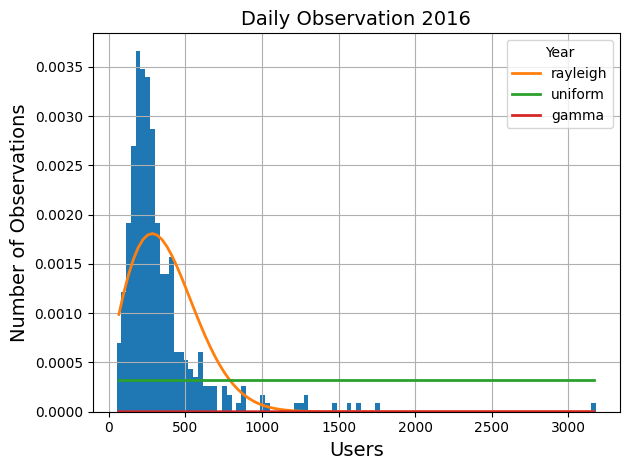

2024-02-27 21:12:52.029 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1.6e-05)
2024-02-27 21:12:52.030 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=6e-05)
2024-02-27 21:12:52.061 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=7e-05)


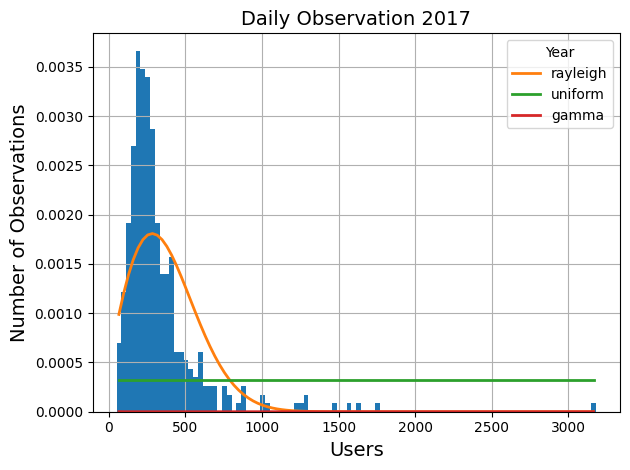

2024-02-27 21:12:52.417 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1.6e-05)
2024-02-27 21:12:52.434 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=6e-05)
2024-02-27 21:12:52.459 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=7e-05)


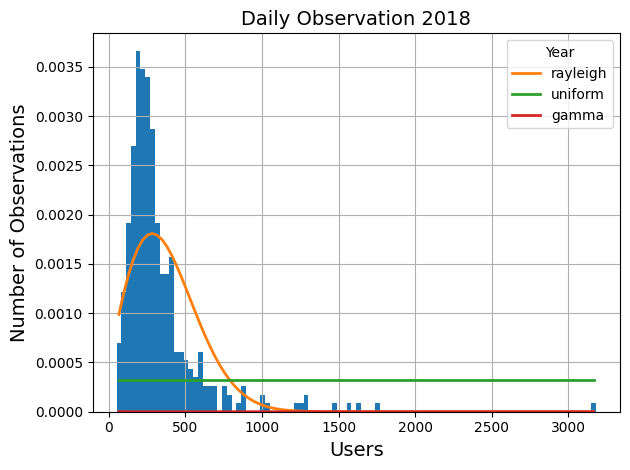

2024-02-27 21:12:53.079 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=6e-05)
2024-02-27 21:12:53.090 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1.6e-05)
2024-02-27 21:12:53.102 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=7e-05)


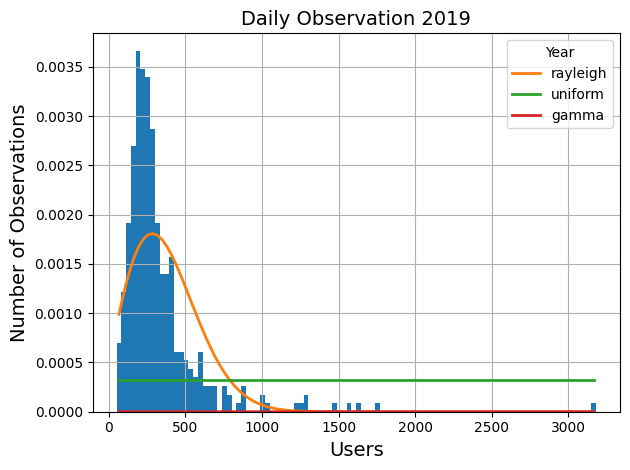

2024-02-27 21:12:53.425 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1.6e-05)
2024-02-27 21:12:53.428 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=6e-05)
2024-02-27 21:12:53.459 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=7e-05)


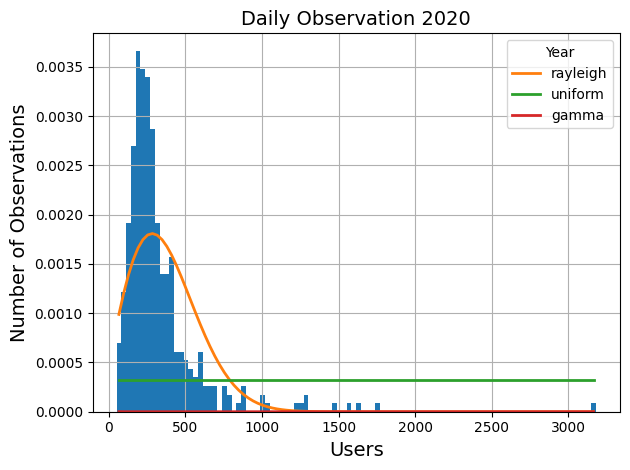

2024-02-27 21:12:53.804 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=6e-05)
2024-02-27 21:12:53.806 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1.6e-05)
2024-02-27 21:12:53.839 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=7e-05)


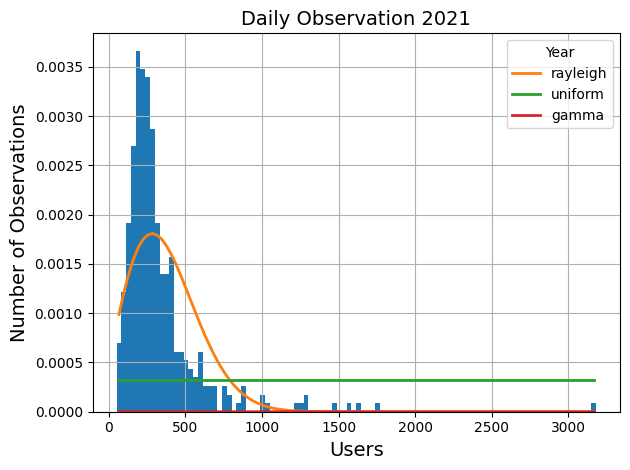

2024-02-27 21:12:54.165 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1.6e-05)
2024-02-27 21:12:54.167 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=6e-05)
2024-02-27 21:12:54.201 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=7e-05)


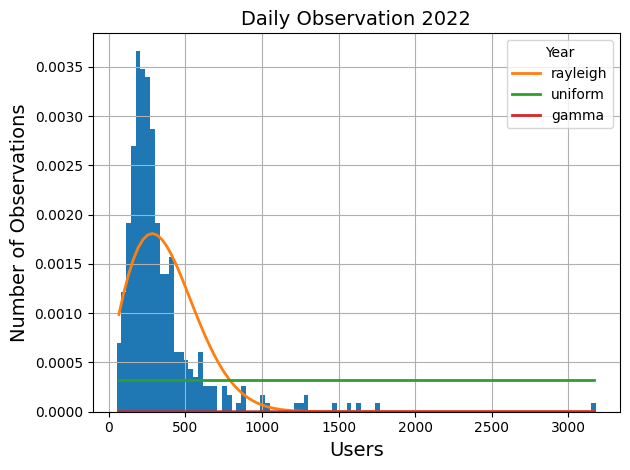

2024-02-27 21:12:54.560 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1.6e-05)
2024-02-27 21:12:54.568 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=6e-05)
2024-02-27 21:12:54.600 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=7e-05)


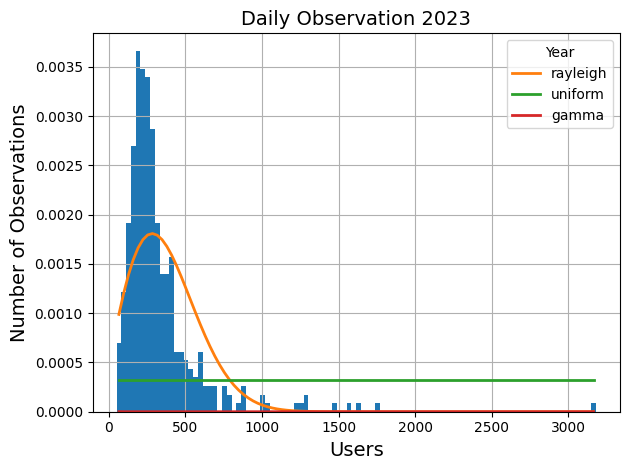

In [172]:
## NOT CORRECT. RECHECK THE CODE 
def fit_and_plot_distribution(data, year):
    # Call the observation_per_day function to generate the data
    daily_counts = observation_per_day(data, year)

    # Fit the distribution 
    f = Fitter(daily_counts, distributions=['gamma', 'rayleigh', 'uniform'])
    f.fit()
    f.summary()

    plt.title(f'Daily Observation {year}', fontsize=14)
    plt.xlabel('Users', fontsize=14)
    plt.ylabel('Number of Observations', fontsize=14)
    plt.legend(title='Year', loc='upper right')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

for year in years:
    fit_and_plot_distribution(data, year)


2024-02-27 20:45:24.223 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=2e-06)
2024-02-27 20:45:24.228 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)
2024-02-27 20:45:24.266 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=3e-06)


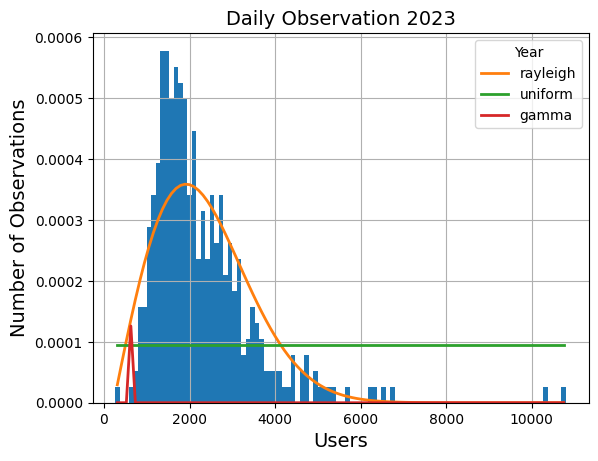

In [163]:
data_2023 = observation_per_day(sf_2023,2023)

# Clean the data by removing missing or non-finite values
data_t_cleaned = data_2023.dropna().values

# Fit the distribution using Fitter
f = Fitter(data_t_cleaned, distributions=['gamma', 'rayleigh', 'uniform'])
f.fit()
f.summary()


plt.title('Daily Observation 2023', fontsize=14)
plt.xlabel('Users', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)
plt.legend(title='Year', loc='upper right')
plt.grid(True)

## Observation per week

In [192]:
def observation_per_week(data, year):
    data_copy = data.copy()
    data_copy['time_observed_at'] = pd.to_datetime(data_copy['time_observed_at'])
    
    # Set 'time_observed_at' as the index
    data_copy.set_index('time_observed_at', inplace=True)
    
    # Resample the data to weekly frequency and calculate counts
    weekly_counts = data_copy.resample('W').size()
    
    # Reset the index to avoid issues on subsequent runs
    data_copy.reset_index(inplace=True)
    
    # Plotting
    plt.plot(weekly_counts.index, weekly_counts, label=str(year))
    
    return weekly_counts


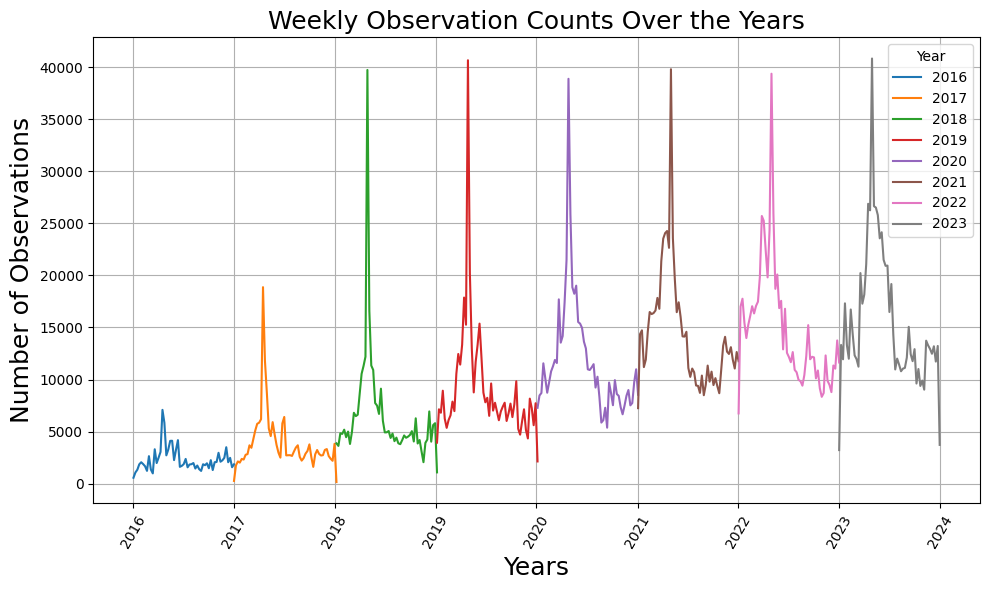

In [193]:

dataframes = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

plt.figure(figsize=(10, 6))

# Plot
for df, year in zip(dataframes, years):
    observation_per_week(df, year)

plt.title('Weekly Observation Counts Over the Years', fontsize=18)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Number of Observations', fontsize=18)
plt.legend(title='Year', loc='upper right')
plt.grid(True)

# Set x-axis ticks to week numbers
plt.xticks(rotation=60)


plt.tight_layout()
plt.show()

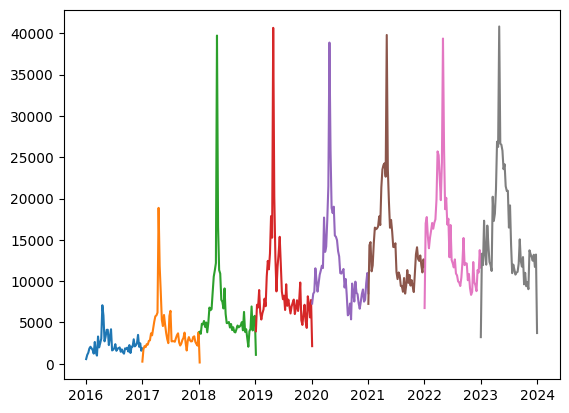

In [196]:
wk_ob_2016 = observation_per_week(sf_2016,2016)
wk_ob_2017 = observation_per_week(sf_2017,2017)
wk_ob_2018 = observation_per_week(sf_2018,2018)
wk_ob_2019 = observation_per_week(sf_2019,2019)
wk_ob_2020 = observation_per_week(sf_2020,2020)
wk_ob_2021 = observation_per_week(sf_2021,2021)
wk_ob_2022 = observation_per_week(sf_2022,2022)
wk_ob_2023 = observation_per_week(sf_2023,2023)

wk_ob_c_2016 = wk_ob_2016.dropna().values
wk_ob_c_2017 = wk_ob_2017.dropna().values
wk_ob_c_2018 = wk_ob_2018.dropna().values
wk_ob_c_2019 = wk_ob_2019.dropna().values
wk_ob_c_2020 = wk_ob_2020.dropna().values
wk_ob_c_2021 = wk_ob_2021.dropna().values
wk_ob_c_2022 = wk_ob_2022.dropna().values
wk_ob_c_2023 = wk_ob_2023.dropna().values


2024-02-27 23:19:42.187 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=8e-06)
2024-02-27 23:19:42.225 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1e-05)
2024-02-27 23:19:42.226 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=5e-06)


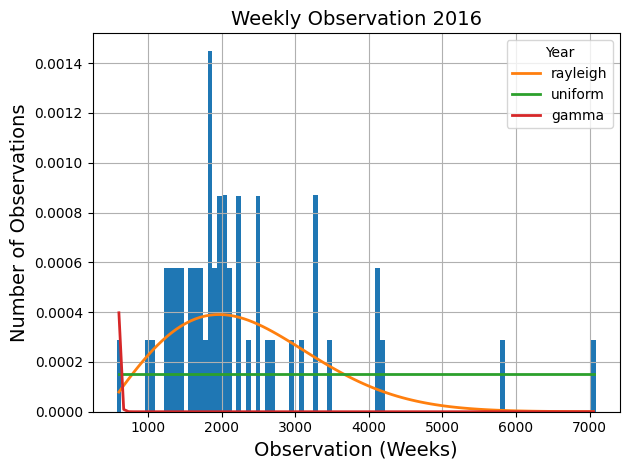

2024-02-27 23:19:42.415 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=1e-06)
2024-02-27 23:19:42.427 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1e-06)
2024-02-27 23:19:42.451 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=2e-06)


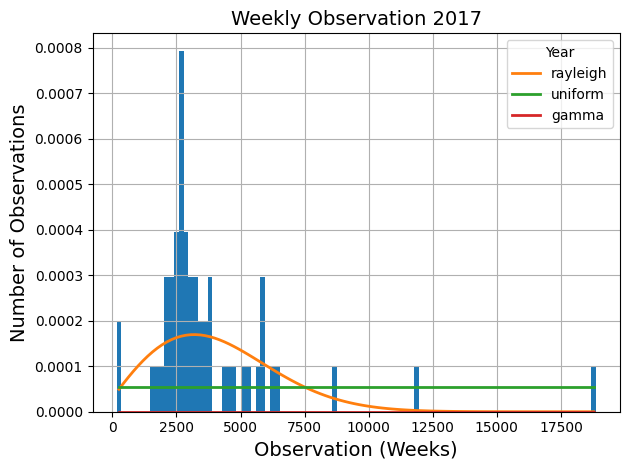

2024-02-27 23:19:42.616 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)
2024-02-27 23:19:42.619 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=1e-06)
2024-02-27 23:19:42.652 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1e-06)


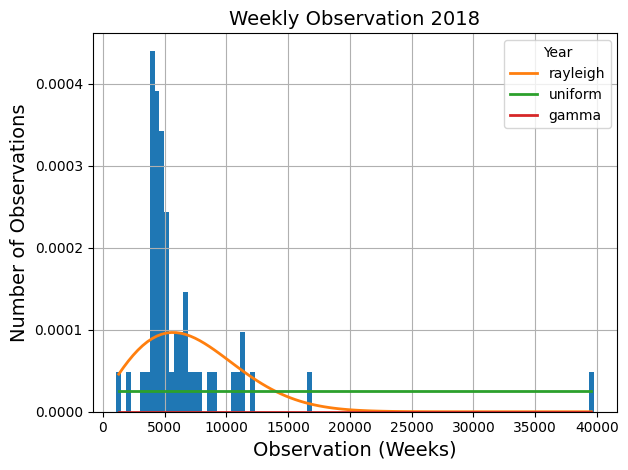

2024-02-27 23:19:42.822 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-02-27 23:19:42.851 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-02-27 23:19:42.852 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)


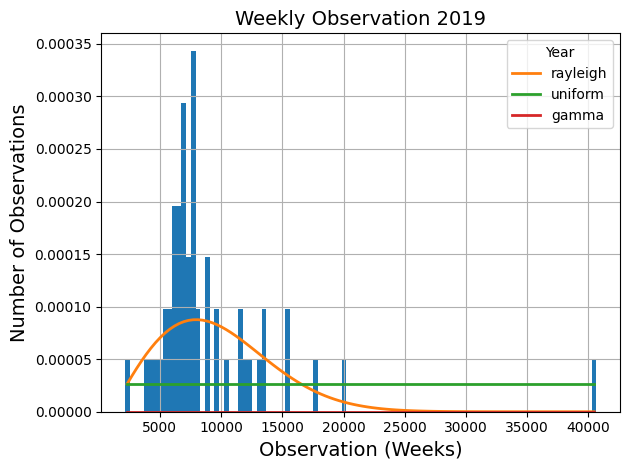

2024-02-27 23:19:43.028 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-02-27 23:19:43.055 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-02-27 23:19:43.057 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)


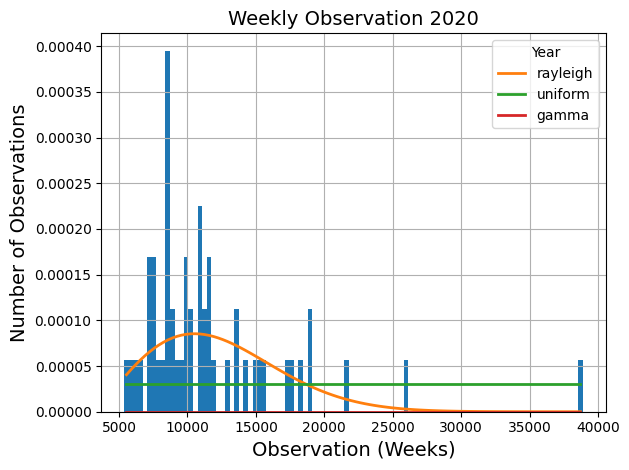

2024-02-27 23:19:43.234 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-02-27 23:19:43.253 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-02-27 23:19:43.253 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)


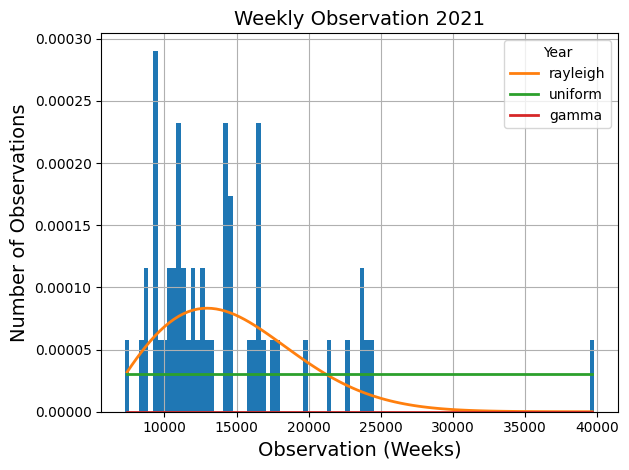

2024-02-27 23:19:43.426 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-02-27 23:19:43.457 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-02-27 23:19:43.458 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)


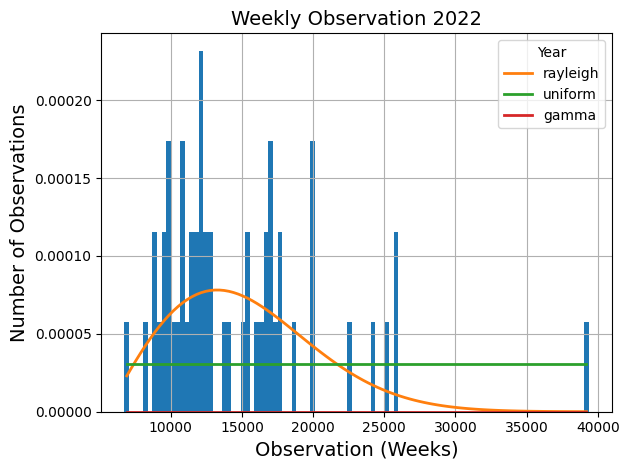

2024-02-27 23:19:43.859 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-02-27 23:19:43.870 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)
2024-02-27 23:19:43.881 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)


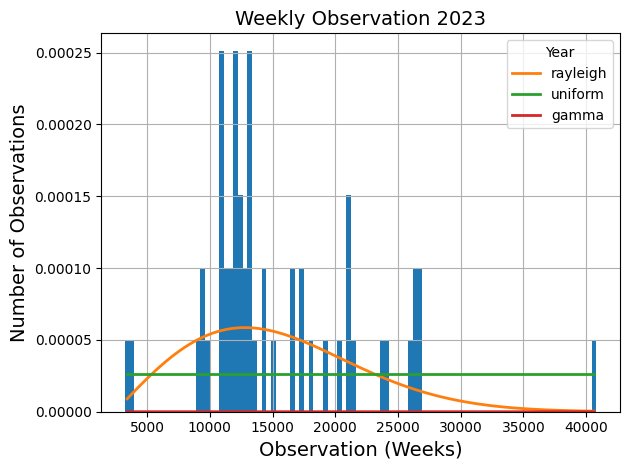

In [203]:
#Method 2 : this is efficient than the one i did up

#define a function
def fit_and_plot_distribution(data, year):
    # Fit the distribution using Fitter
    f = Fitter(data, distributions=['gamma', 'rayleigh', 'uniform'])
    f.fit()
    f.summary()

    plt.title(f'Weekly Observation {year}', fontsize=14)
    plt.xlabel('Observation (Weeks)', fontsize=14)
    plt.ylabel('Number of Observations', fontsize=14)
    plt.legend(title='Year', loc='upper right')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

for year in years:
    data = globals()[f'wk_ob_c_{year}']
    fit_and_plot_distribution(data, year)

## Observations per month 

In [33]:
def observation_per_month(data, year):
    # Extract month from 'time_observed_at'
    data['month'] = data['time_observed_at'].dt.month
    # Group by 'month' and calculate counts
    monthly_counts = data.groupby('month').size()
    # Def month names
    month_names = [calendar.month_abbr[i] for i in range(1, 13)]
    # Plotting
    plt.plot(monthly_counts.index, monthly_counts, label=str(year))
    return monthly_counts

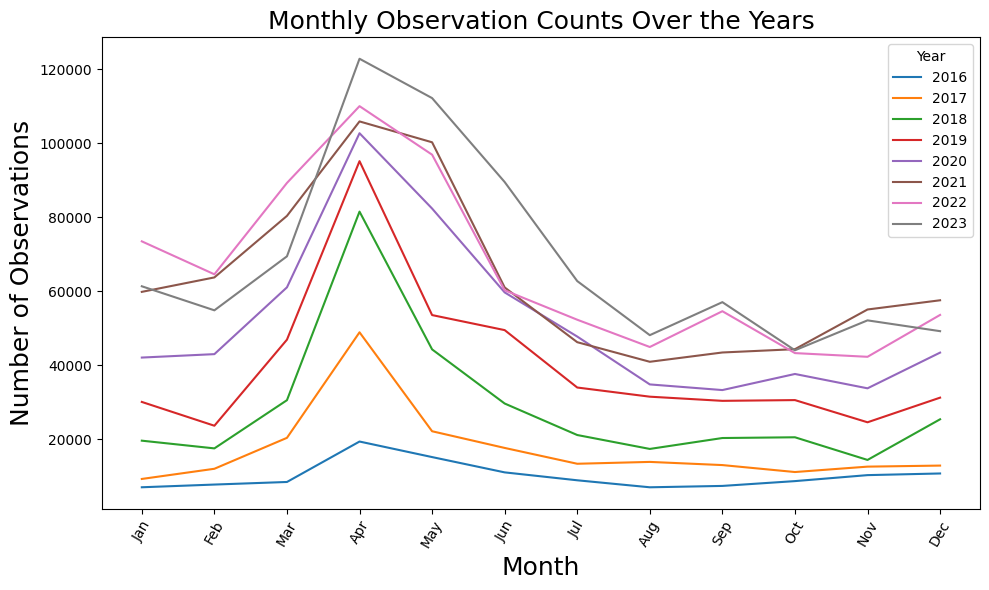

In [34]:
# Dataframes and years
dataframes = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

plt.figure(figsize=(10, 6))

# Plot
for df, year in zip(dataframes, years):
    observation_per_month(df, year)

plt.title('Monthly Observation Counts Over the Years', fontsize = 18)
plt.xlabel('Month',fontsize = 18)
plt.ylabel('Number of Observations',fontsize = 18)
plt.legend(title='Year', loc='upper right')
#plt.grid(True)

# Set x-axis ticks to month names
plt.xticks(range(1, 13), labels=calendar.month_abbr[1:], rotation=60)

plt.tight_layout()
plt.show()


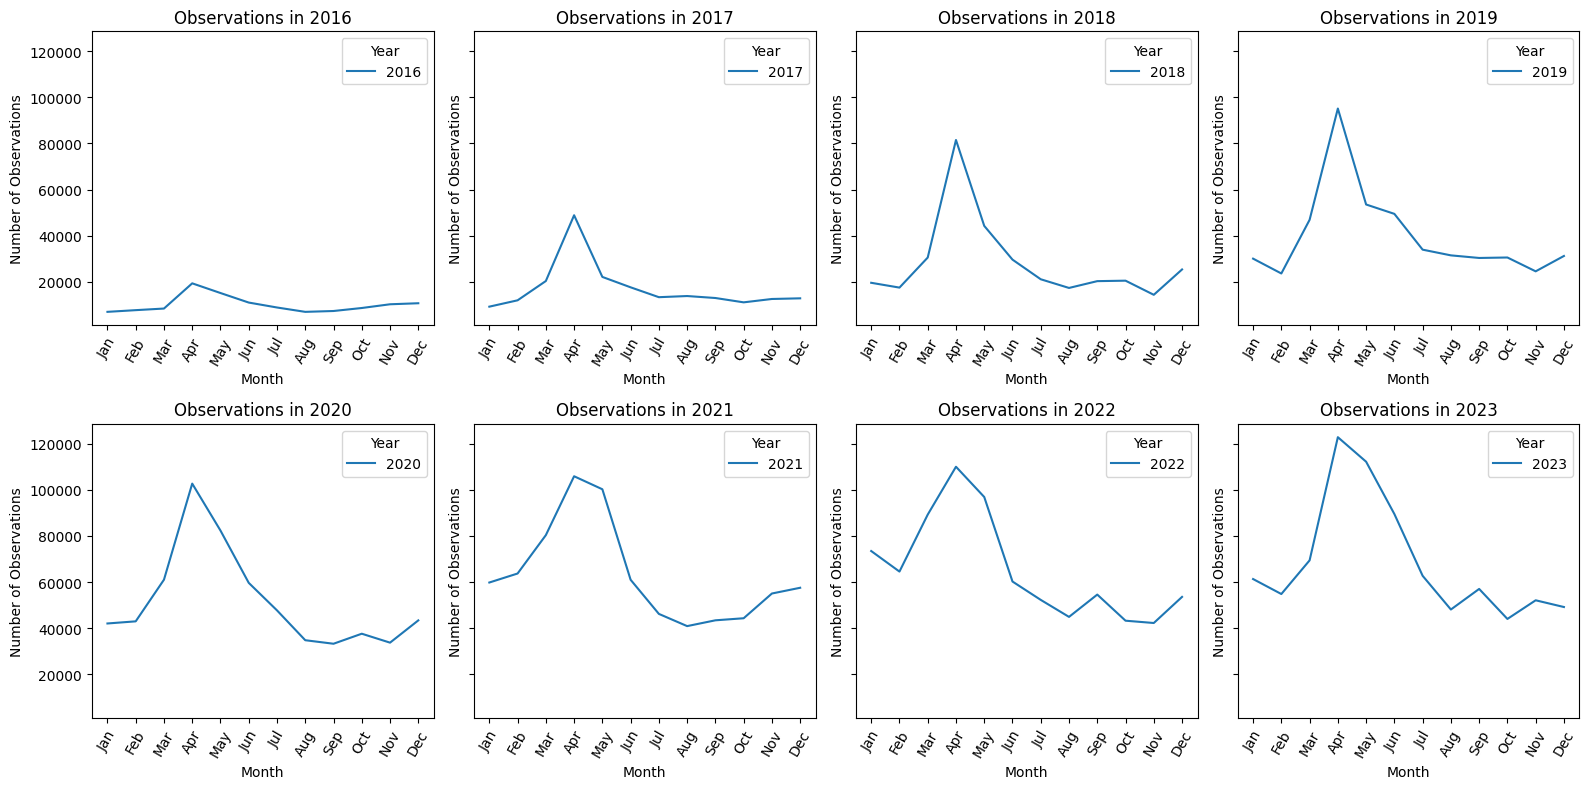

In [35]:
# Dataframes and years
dataframes = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Create separate subplots for each year
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8), sharey=True)
axes = axes.flatten()

# Plotting
for i, (df, year) in enumerate(zip(dataframes, years)):
    plt.sca(axes[i])
    observation_per_month(df, year)
    
    plt.title(f'Observations in {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Observations')
    plt.legend(title='Year', loc='upper right')
    plt.xticks(range(1, 13), labels=calendar.month_abbr[1:], rotation=60)

plt.tight_layout()
plt.show()


## Observation on Weekends and Weekdays 

In [37]:
def observation_per_month_weekday_fit(data, year):
    # Filter weekday data 
    weekday_data = data[data['day_type'] == 'Weekday'].copy()

    # Extract month from 'time_observed_at'
    weekday_data['month'] = weekday_data['time_observed_at'].dt.month

    # Group by 'month' and calculate counts
    monthly_counts = weekday_data.groupby('month').size()
    
    # Fit distributions using fitter
    f = Fitter(monthly_counts, distributions=['gamma', 'rayleigh', 'uniform'])
    f.fit()

    # Display the summary
    print(f.summary())

    # Plot original data
    #plt.plot(monthly_counts.index, monthly_counts, label=f'Original - {year}')

    # Plot the fitted distribution
    #f.plot_pdf()
    
    # Def month names
    month_names = [calendar.month_abbr[i] for i in range(1, 13)]
    
    return monthly_counts


2024-02-26 21:51:54.125 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=2.3e-05)
2024-02-26 21:51:54.140 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=2.4e-05)
2024-02-26 21:51:54.147 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1.8e-05)


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma            0.000018  1987.088224  1988.542944     inf      0.241169   
rayleigh         0.000023  1844.523403  1845.493217     inf      0.277298   
uniform          0.000024  1745.562710  1746.532524     inf      0.445647   

          ks_pvalue  
gamma      0.421135  
rayleigh   0.262250  
uniform    0.010851  


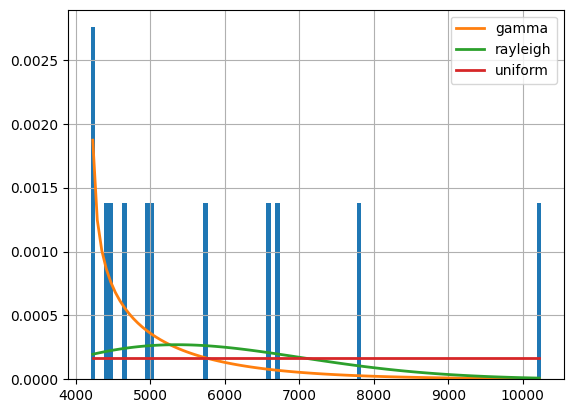

In [48]:
#test
data_w = observation_per_month_weekday_fit(sf_2016,2016)

2024-02-26 21:44:58.410 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1.8e-05)
2024-02-26 21:44:58.414 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=2.4e-05)
2024-02-26 21:44:58.414 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=2.3e-05)


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma            0.000018  1987.088224  1988.542944     inf      0.241169   
rayleigh         0.000023  1844.523403  1845.493217     inf      0.277298   
uniform          0.000024  1745.562710  1746.532524     inf      0.445647   

          ks_pvalue  
gamma      0.421135  
rayleigh   0.262250  
uniform    0.010851  


2024-02-26 21:44:58.685 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=3e-06)
2024-02-26 21:44:58.688 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=3e-06)
2024-02-26 21:44:58.727 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=3e-06)


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma            0.000003  2125.914453  2127.369173     inf      0.259541   
rayleigh         0.000003  2157.247760  2158.217574     inf      0.348617   
uniform          0.000003  1983.624638  1984.594451     inf      0.572425   

          ks_pvalue  
gamma      0.334325  
rayleigh   0.082970  
uniform    0.000299  


2024-02-26 21:44:59.130 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=1e-06)
2024-02-26 21:44:59.142 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1e-06)
2024-02-26 21:44:59.160 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1e-06)


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma        6.623721e-07  2242.967631  2244.422351     inf      0.207372   
rayleigh     7.283400e-07  2220.095744  2221.065557     inf      0.330394   
uniform      7.865724e-07  2086.662535  2087.632348     inf      0.559369   

          ks_pvalue  
gamma      0.609326  
rayleigh   0.114369  
uniform    0.000458  


2024-02-26 21:44:59.737 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1e-06)
2024-02-26 21:44:59.745 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=1e-06)
2024-02-26 21:44:59.769 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1e-06)


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
rayleigh     6.232019e-07  2202.750715  2203.720528     inf      0.278793   
gamma        6.576377e-07  2316.289104  2317.743824     inf      0.435879   
uniform      6.599315e-07  2104.217405  2105.187218     inf      0.489706   

          ks_pvalue  
rayleigh   0.256728  
gamma      0.013667  
uniform    0.003547  


2024-02-26 21:45:00.703 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)
2024-02-26 21:45:00.718 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-02-26 21:45:00.740 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma        4.203690e-07  2348.137346  2349.592066     inf      0.223080   
rayleigh     4.776526e-07  2241.548166  2242.517979     inf      0.244188   
uniform      4.906192e-07  2148.640261  2149.610074     inf      0.415773   

          ks_pvalue  
gamma      0.518090  
rayleigh   0.406045  
uniform    0.021569  


2024-02-26 21:45:01.716 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)
2024-02-26 21:45:01.755 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-02-26 21:45:01.756 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma        3.965505e-07  2245.855416  2247.310136     inf      0.215988   
rayleigh     4.283985e-07  2197.872648  2198.842461     inf      0.189574   
uniform      4.379129e-07  2127.884619  2128.854432     inf      0.396596   

          ks_pvalue  
gamma      0.558701  
rayleigh   0.714870  
uniform    0.032561  


2024-02-26 21:45:02.749 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1e-06)
2024-02-26 21:45:02.755 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=1e-06)
2024-02-26 21:45:02.789 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1e-06)


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma        6.322103e-07  2199.140712  2200.595432     inf      0.289984   
uniform      6.352680e-07  2108.026317  2108.996131     inf      0.292479   
rayleigh     6.387935e-07  2145.405369  2146.375182     inf      0.178149   

          ks_pvalue  
gamma      0.218070  
uniform    0.210083  
rayleigh   0.779890  


2024-02-26 21:45:03.756 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)
2024-02-26 21:45:03.763 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-02-26 21:45:03.793 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma        3.773366e-07  2275.107488  2276.562208     inf      0.200994   
rayleigh     3.996064e-07  2220.393207  2221.363020     inf      0.274319   
uniform      4.066505e-07  2152.635596  2153.605409     inf      0.419047   

          ks_pvalue  
gamma      0.647266  
rayleigh   0.273502  
uniform    0.020058  


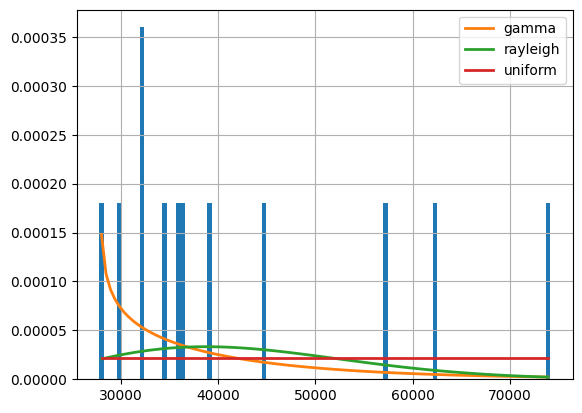

In [38]:
# Dataframes and years weekday
dataframes = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Loop through dataframes and years
for df, year in zip(dataframes, years):
    observation_per_month_weekday_fit(df, year)

In [39]:
def observation_per_month_weekday(data, year):
    # Filter weekday data 
    weekday_data = data[data['day_type'] == 'Weekday'].copy()

    # Extract month from 'time_observed_at'
    weekday_data['month'] = weekday_data['time_observed_at'].dt.month

    # Group by 'month' and calculate counts
    monthly_counts = weekday_data.groupby('month').size()
  
    # Def month names
    month_names = [calendar.month_abbr[i] for i in range(1, 13)]

    # Plotting
    plt.plot(monthly_counts.index, monthly_counts, label=str(year))
    return monthly_counts

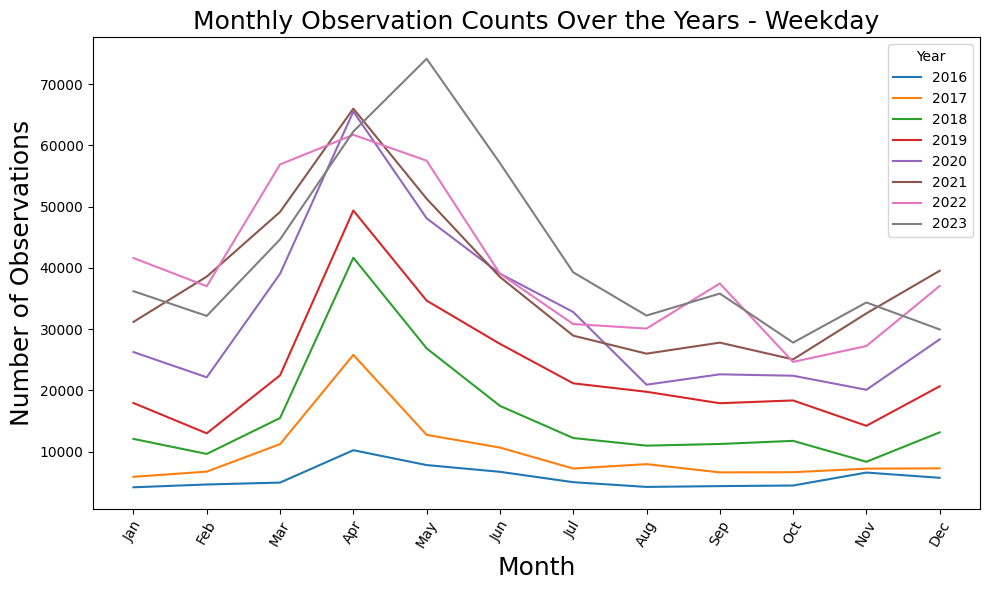

In [40]:
# Dataframes and years weekday
dataframes = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

plt.figure(figsize=(10, 6))

# Plot
for df, year in zip(dataframes, years):
    observation_per_month_weekday(df, year)

plt.title('Monthly Observation Counts Over the Years - Weekday',fontsize = 18)
plt.xlabel('Month',fontsize = 18)
plt.ylabel('Number of Observations',fontsize = 18)
plt.legend(title='Year', loc='upper right')
#plt.grid(True)

# Set x-axis ticks to month names
plt.xticks(range(1, 13), labels=calendar.month_abbr[1:], rotation=60)

plt.tight_layout()
plt.show()


## Weekends observation each year 

In [41]:
def observation_per_month_weekend(data, year):
    # Filter weekday data 
    weekend_data = data[data['day_type'] == 'Weekend'].copy()

    # Extract month from 'time_observed_at'
    weekend_data['month'] = weekend_data['time_observed_at'].dt.month

    # Group by 'month' and calculate counts
    monthly_counts = weekend_data.groupby('month').size()
  
    # Def month names
    month_names = [calendar.month_abbr[i] for i in range(1, 13)]

    # Plotting
    plt.plot(monthly_counts.index, monthly_counts, label=str(year))
    return monthly_counts

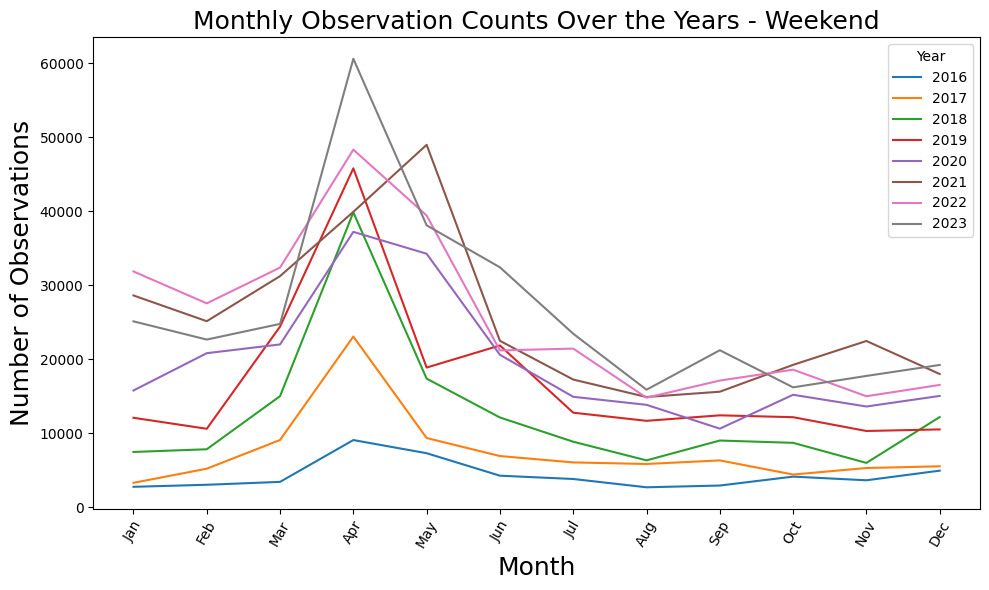

In [42]:
# Dataframes and years weekend
dataframes = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

plt.figure(figsize=(10, 6))

# Plot
for df, year in zip(dataframes, years):
    observation_per_month_weekend(df, year)

plt.title('Monthly Observation Counts Over the Years - Weekend',fontsize = 18)
plt.xlabel('Month',fontsize = 18)
plt.ylabel('Number of Observations',fontsize = 18)
plt.legend(title='Year', loc='upper right')
#plt.grid(True)

# Set x-axis ticks to month names
plt.xticks(range(1, 13), labels=calendar.month_abbr[1:], rotation=60)

plt.tight_layout()
plt.show()

In [ ]:
#test weekend and weekday
user_counts = sf_2016.groupby(['user_id', 'day_type']).size().reset_index(name='count')
user_counts = user_counts.pivot_table(index='user_id', columns='day_type', values='count', fill_value=0).reset_index()
user_counts.columns.name = None  # Remove the top-level column name
user_counts = user_counts[(user_counts['Weekday'] > 10) & (user_counts['Weekend'] > 10)]
user_counts

In [ ]:
user_counts = user_counts[(user_counts['Weekday'] > 0) & (user_counts['Weekend'] > 0)]

#  subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# subplot (axs[0])
sns.histplot(data=user_counts, x="Weekday", log_scale=(True, True), color="skyblue", label="Weekday", bins=100, ax=axs[0])

# subplot (axs[1])
sns.histplot(data=user_counts, x="Weekend",log_scale=(True, True), color="red", label="Weekend", bins=100, ax=axs[1])

# Add legend 
axs[0].legend()
axs[1].legend()

# Title
plt.suptitle('Observation per user : Weekday vs Weekend')


plt.show()


In [ ]:
data = user_counts[(user_counts['Weekday'] > 0)]
                   
f = Fitter(data, distributions=['gamma', 'rayleigh', 'uniform'])
f.fit()
                   
# Display the summary
print(f.summary())
